In [1]:
#Importing Necessary Libraries


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

## 1.1 Problem Statement and Exploratory Data Analysis

### 1.1.1 Problem Definition

#### The comp-activ database comprises activity measures of computer systems. Data was gathered from a Sun Sparcstation 20/712 with 128 Mbytes of memory, operating in a multi-user university department. Users engaged in diverse tasks, such as internet access, file editing, and CPU-intensive programs.

#### Being an aspiring data scientist, you aim to establish a linear equation for predicting 'usr' (the percentage of time CPUs operate in user mode). Your goal is to analyze various system attributes to understand their influence on the system's 'usr' mode.

In [2]:
# Reading the Dataset

df=pd.read_excel('compactiv_copy.xlsx')

In [3]:
# Making a copy of the original dataset


df1=df.copy()
df2=df1.copy()
df3=df2.copy()
df4=df3.copy()

In [4]:
# Checking the dataset whether it is loading properly or not? Using the head function


df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,NaN,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,NaN,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


### 1.1.2 Check shape

In [5]:
# Checking shape using the sahpe function

print("The No. of Rows    = ",df.shape[0])
print("The No. of Columns = ",df.shape[1])

The No. of Rows    =  8192
The No. of Columns =  22


### 1.1.3 Data types 

In [6]:
# The datatypes can be checked using the info function

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [7]:
# There are 21 numerical and 1 categorical variable
# There are 2 variables rchar & wchar has null values

### 1.1.4 Statistical summary

In [8]:
# Statistical summary can be obtained by using describe function

df.describe().T

,count,mean,std,min,25%,50%,75%,max
lread,8192.0,1.955969e+01,53.353799,0.0,2.0,7.0,20.000,1845.00
lwrite,8192.0,1.310620e+01,29.891726,0.0,0.0,1.0,10.000,575.00
scall,8192.0,2.306318e+03,1633.617322,109.0,1012.0,2051.5,3317.250,12493.00
sread,8192.0,2.104800e+02,198.980146,6.0,86.0,166.0,279.000,5318.00
swrite,8192.0,1.500582e+02,160.478980,7.0,63.0,117.0,185.000,5456.00
fork,8192.0,1.884554e+00,2.479493,0.0,0.4,0.8,2.200,20.12
exec,8192.0,2.791998e+00,5.212456,0.0,0.2,1.2,2.800,59.56
rchar,8088.0,1.973857e+05,239837.493526,278.0,34091.5,125473.5,267828.750,2526649.00
wchar,8177.0,9.590299e+04,140841.707911,1498.0,22916.0,46619.0,106101.000,1801623.00
pgout,8192.0,2.285317e+00,5.307038,0.0,0.0,0.0,2.400,81.44


In [9]:
# Number of characters transferred per second by system read calls is higher at all percentile that sytem wrote calls
# Most fo the varibales having the min value as 0 and values starts at 75% 

In [10]:

df.describe(include='object').T

,count,unique,top,freq
runqsz,8192,2,Not_CPU_Bound,4331


In [11]:
df['runqsz']

0           CPU_Bound
1       Not_CPU_Bound
2       Not_CPU_Bound
3       Not_CPU_Bound
4       Not_CPU_Bound
            ...      
8187        CPU_Bound
8188    Not_CPU_Bound
8189    Not_CPU_Bound
8190        CPU_Bound
8191        CPU_Bound
Name: runqsz, Length: 8192, dtype: object

### 1.1.5 Univariate analysis

In [12]:
# Numerical

def univariateAnalysis_numeric (column, nbins) :
    print ("Description of " +  column)
    print("---------")
    print(df[column].describe().round(2), end=' ')
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (10, 5))
          
    ax = axs[0].hist(df[column], bins=nbins, histtype="bar", edgecolor='Black', color='cyan', lw=2)
    axs[0].set_title("Distribution of " + column)
          
    for container in axs[0].containers:
        axs[0].bar_label (container, label_type="edge", fontsize=10)

    sns.boxplot (y=df[column], orient= 'v', ax=axs[1]) 
    axs[1].set_title("Boxplot of " + column)
    
    plt.tight_layout() #neat output
    plt.show()

In [13]:
df_num=df.select_dtypes(include=['int64','float64'])
list_df_num=list(df_num)
list_df_num

['lread',
 'lwrite',
 'scall',
 'sread',
 'swrite',
 'fork',
 'exec',
 'rchar',
 'wchar',
 'pgout',
 'ppgout',
 'pgfree',
 'pgscan',
 'atch',
 'pgin',
 'ppgin',
 'pflt',
 'vflt',
 'freemem',
 'freeswap',
 'usr']

Description of lread
---------
count    8192.00
mean       19.56
std        53.35
min         0.00
25%         2.00
50%         7.00
75%        20.00
max      1845.00
Name: lread, dtype: float64 

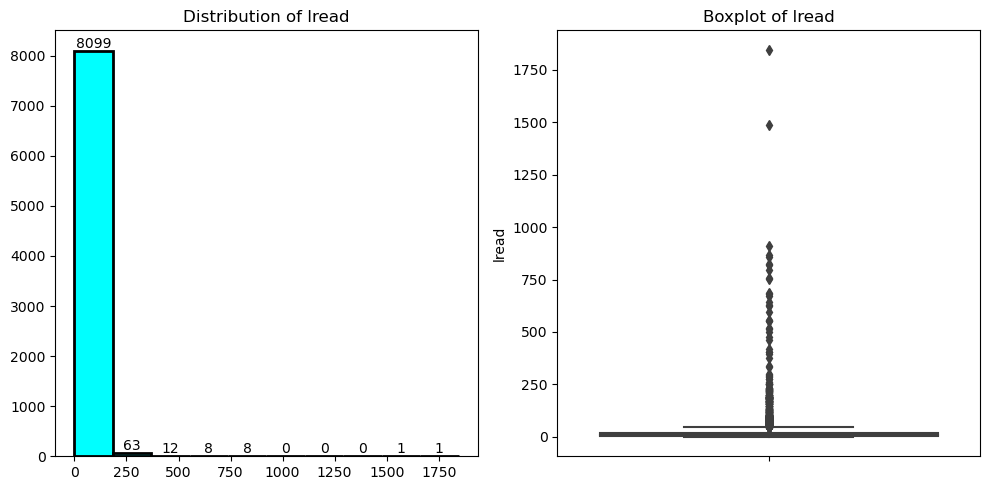

Description of lwrite
---------
count    8192.00
mean       13.11
std        29.89
min         0.00
25%         0.00
50%         1.00
75%        10.00
max       575.00
Name: lwrite, dtype: float64 

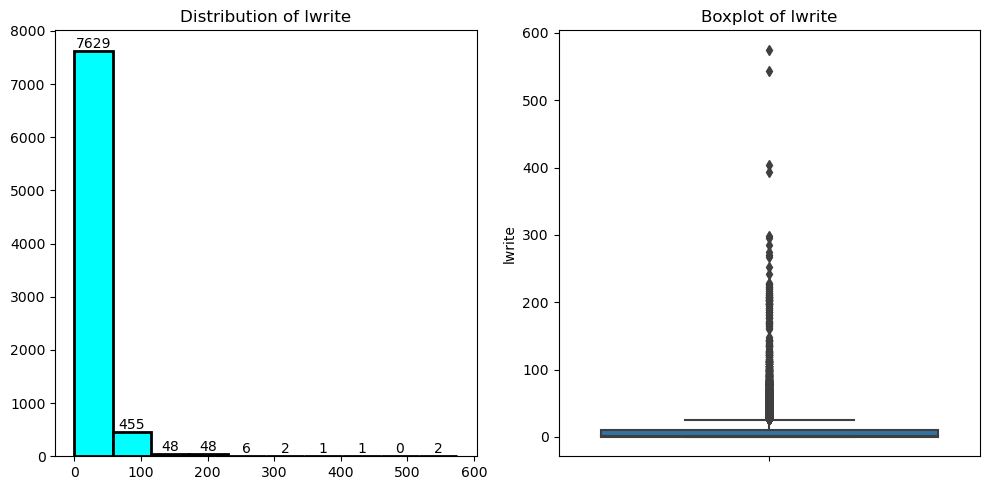

Description of scall
---------
count     8192.00
mean      2306.32
std       1633.62
min        109.00
25%       1012.00
50%       2051.50
75%       3317.25
max      12493.00
Name: scall, dtype: float64 

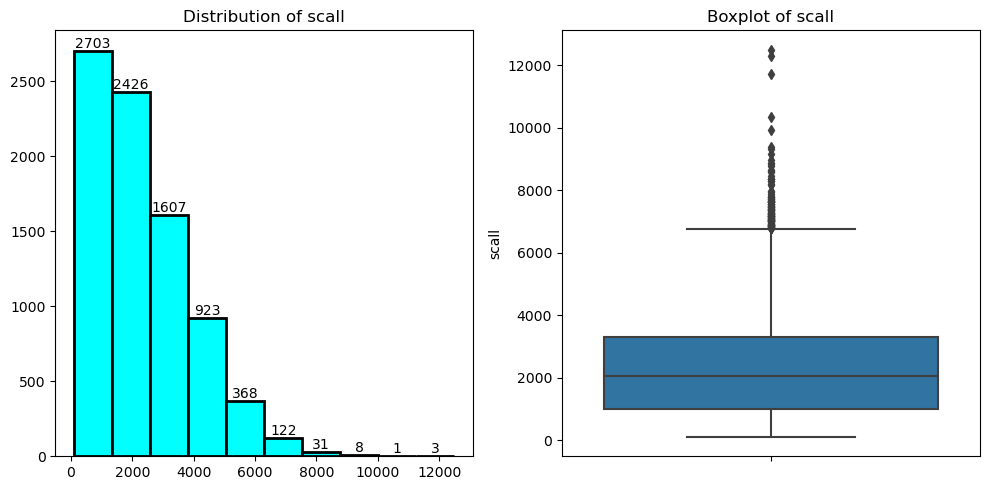

Description of sread
---------
count    8192.00
mean      210.48
std       198.98
min         6.00
25%        86.00
50%       166.00
75%       279.00
max      5318.00
Name: sread, dtype: float64 

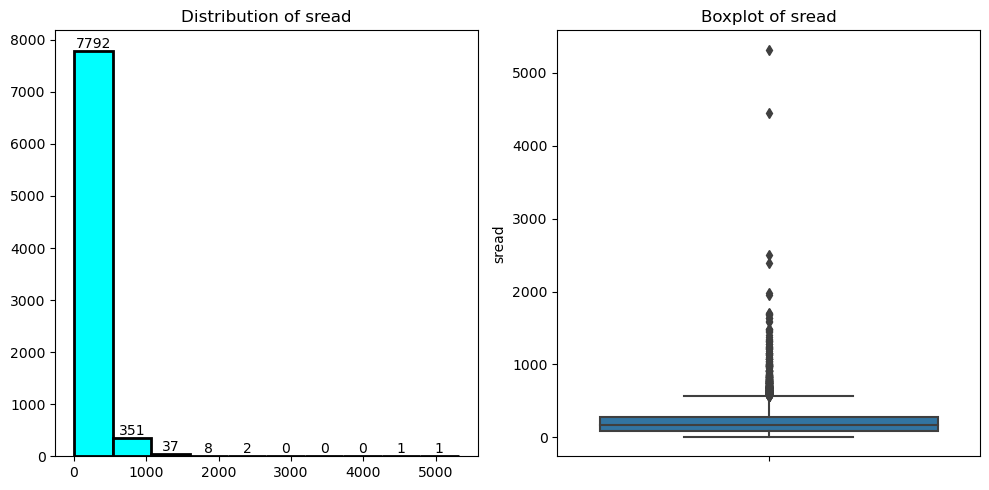

Description of swrite
---------
count    8192.00
mean      150.06
std       160.48
min         7.00
25%        63.00
50%       117.00
75%       185.00
max      5456.00
Name: swrite, dtype: float64 

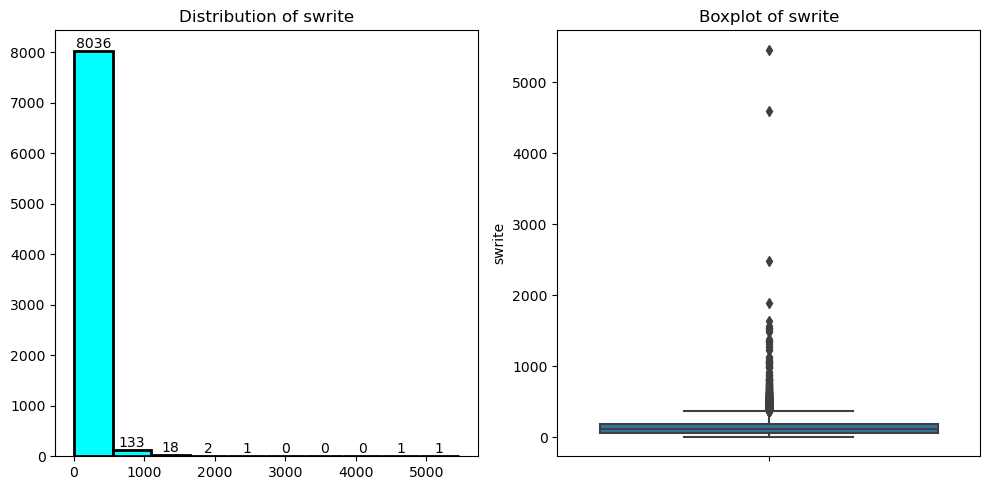

Description of fork
---------
count    8192.00
mean        1.88
std         2.48
min         0.00
25%         0.40
50%         0.80
75%         2.20
max        20.12
Name: fork, dtype: float64 

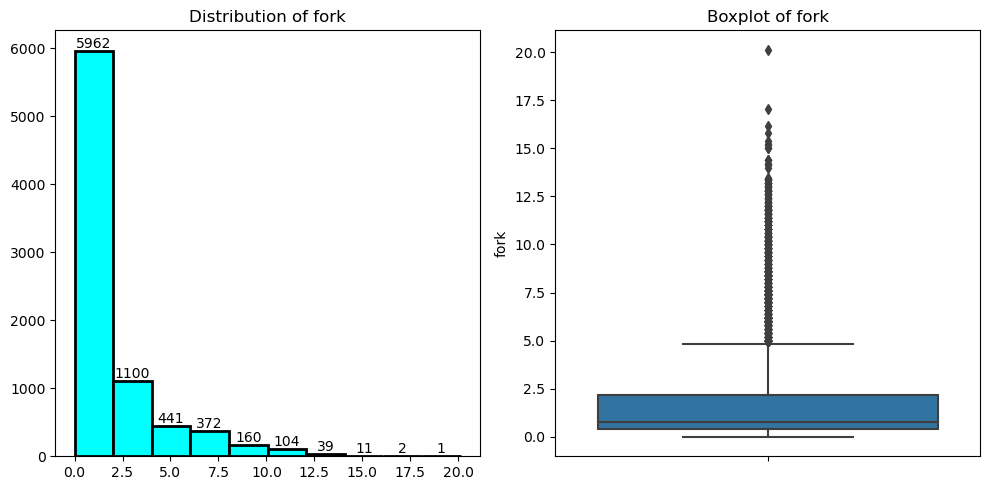

Description of exec
---------
count    8192.00
mean        2.79
std         5.21
min         0.00
25%         0.20
50%         1.20
75%         2.80
max        59.56
Name: exec, dtype: float64 

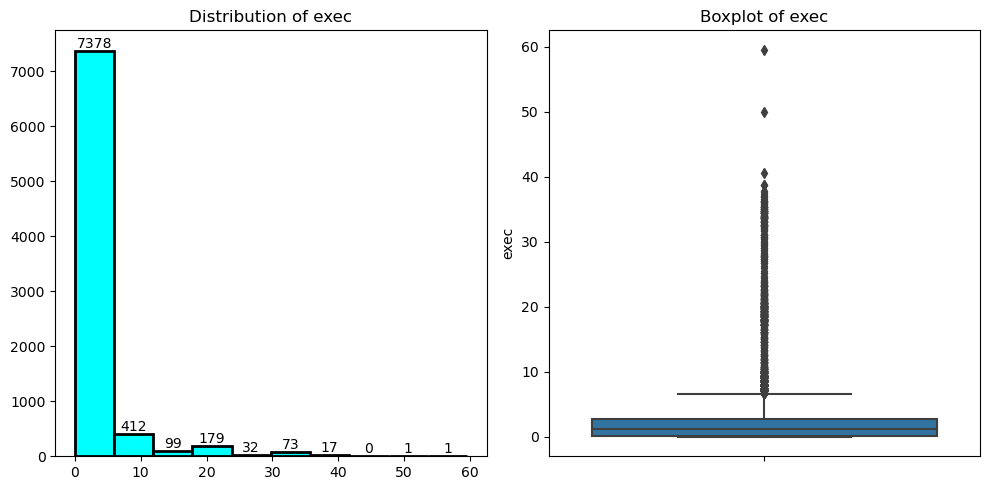

Description of rchar
---------
count       8088.00
mean      197385.73
std       239837.49
min          278.00
25%        34091.50
50%       125473.50
75%       267828.75
max      2526649.00
Name: rchar, dtype: float64 

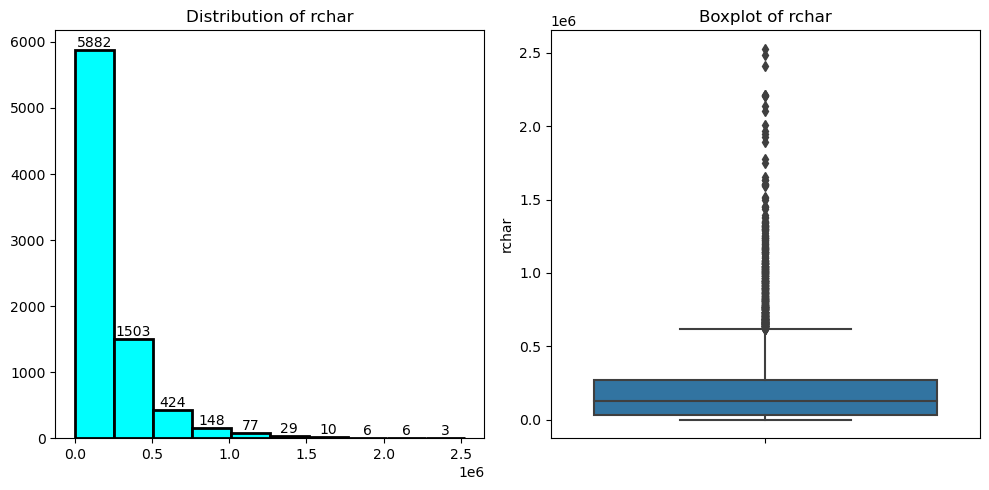

Description of wchar
---------
count       8177.00
mean       95902.99
std       140841.71
min         1498.00
25%        22916.00
50%        46619.00
75%       106101.00
max      1801623.00
Name: wchar, dtype: float64 

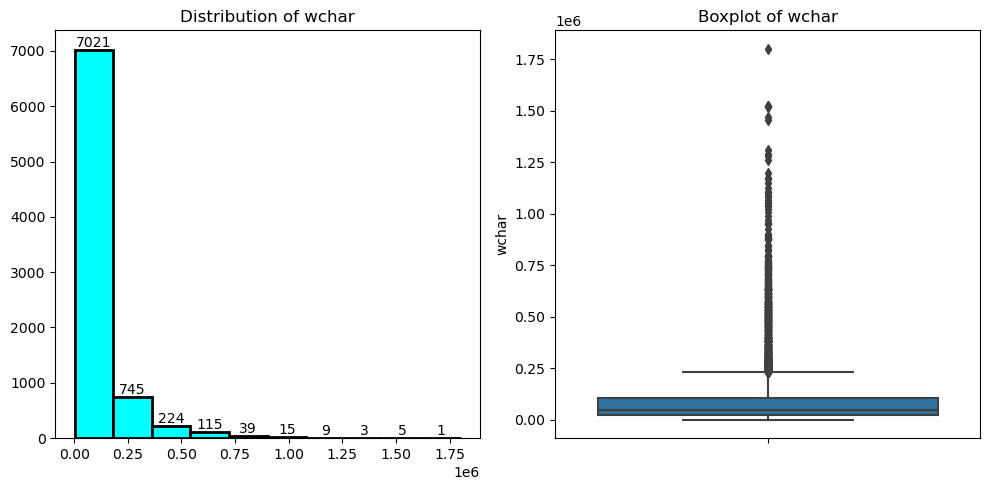

Description of pgout
---------
count    8192.00
mean        2.29
std         5.31
min         0.00
25%         0.00
50%         0.00
75%         2.40
max        81.44
Name: pgout, dtype: float64 

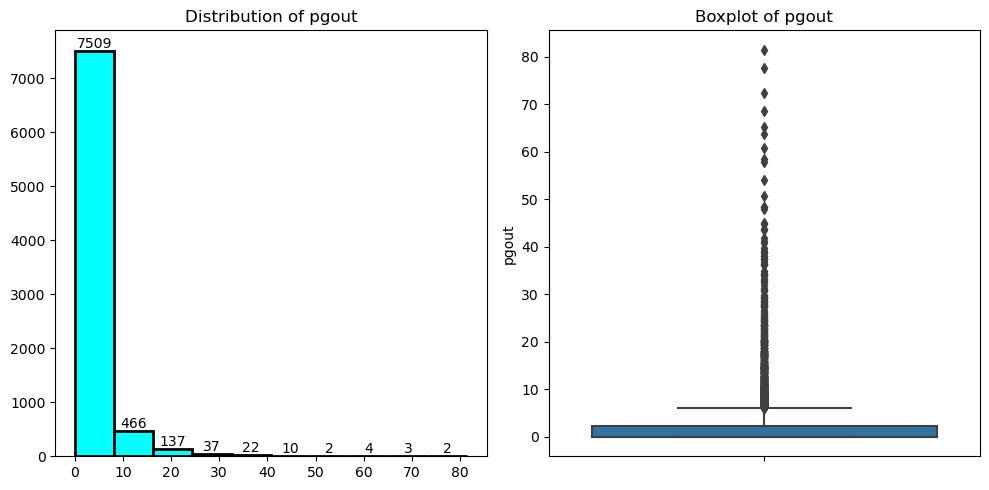

Description of ppgout
---------
count    8192.00
mean        5.98
std        15.21
min         0.00
25%         0.00
50%         0.00
75%         4.20
max       184.20
Name: ppgout, dtype: float64 

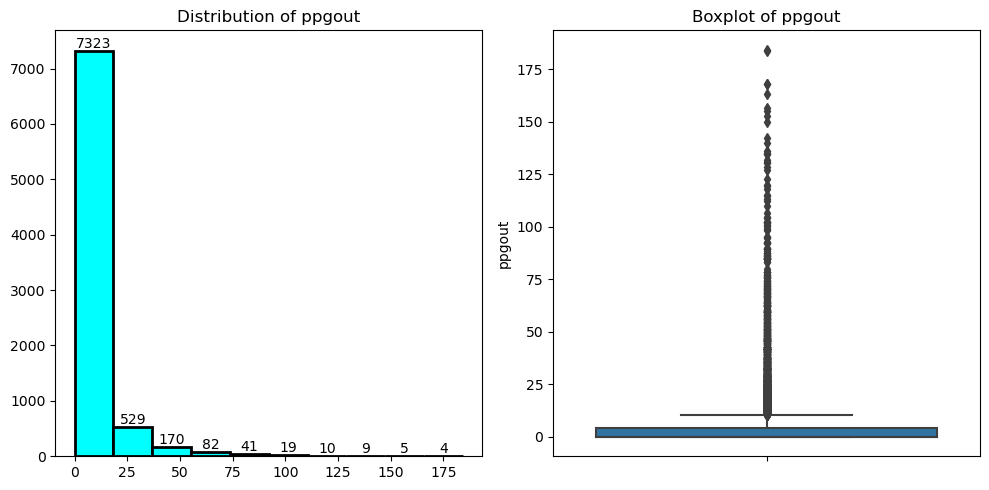

Description of pgfree
---------
count    8192.00
mean       11.92
std        32.36
min         0.00
25%         0.00
50%         0.00
75%         5.00
max       523.00
Name: pgfree, dtype: float64 

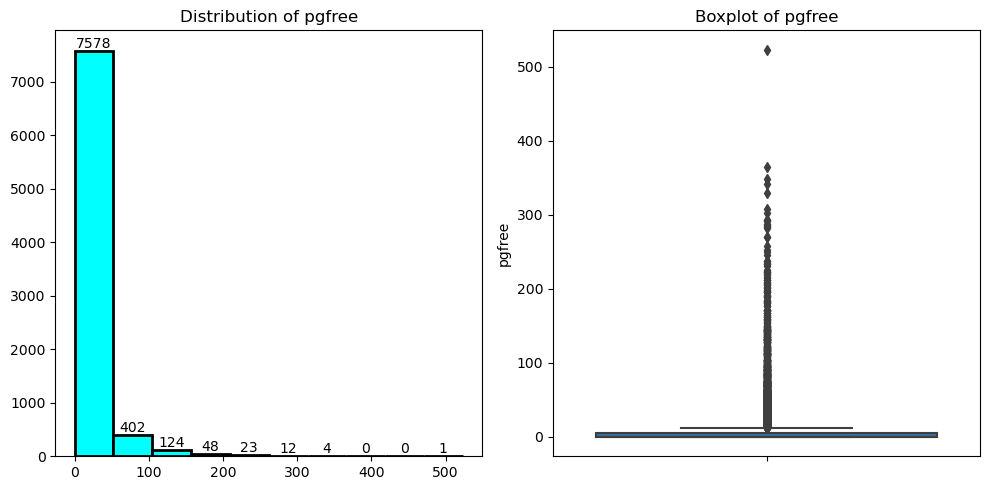

Description of pgscan
---------
count    8192.00
mean       21.53
std        71.14
min         0.00
25%         0.00
50%         0.00
75%         0.00
max      1237.00
Name: pgscan, dtype: float64 

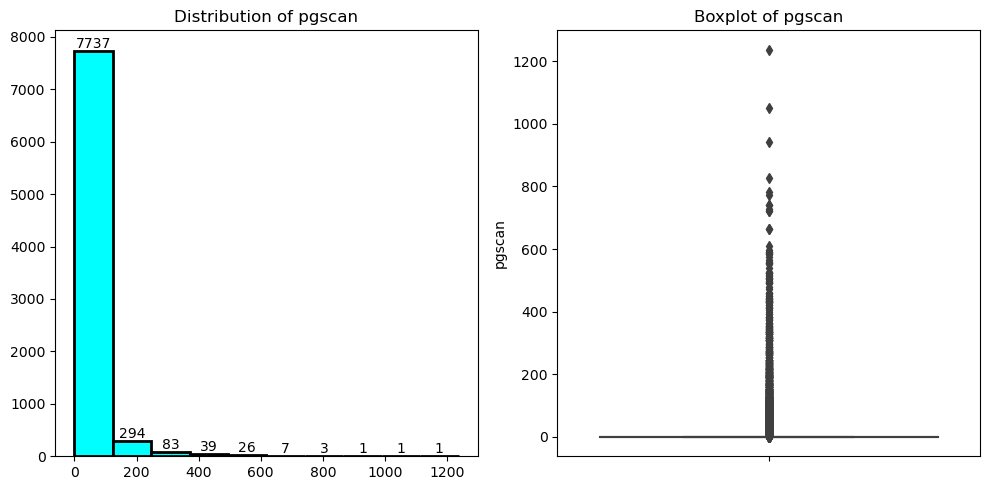

Description of atch
---------
count    8192.00
mean        1.13
std         5.71
min         0.00
25%         0.00
50%         0.00
75%         0.60
max       211.58
Name: atch, dtype: float64 

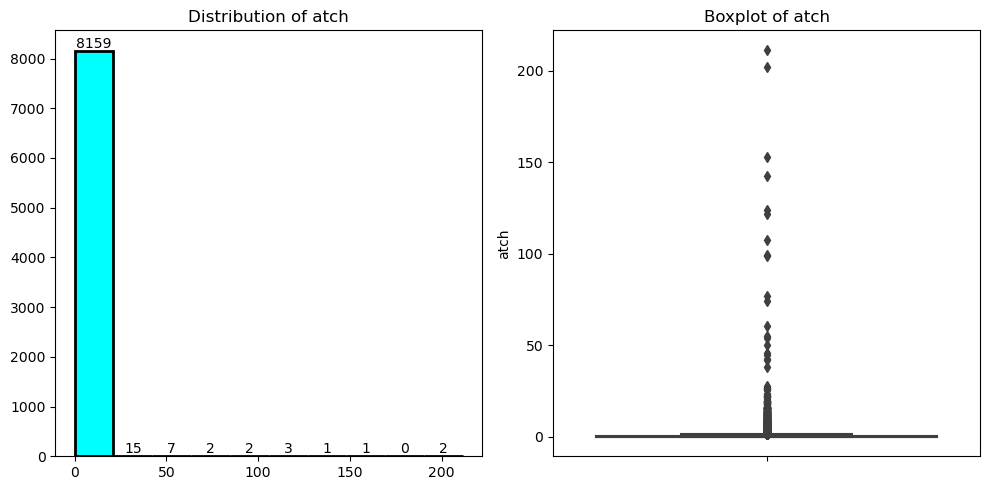

Description of pgin
---------
count    8192.00
mean        8.28
std        13.87
min         0.00
25%         0.60
50%         2.80
75%         9.76
max       141.20
Name: pgin, dtype: float64 

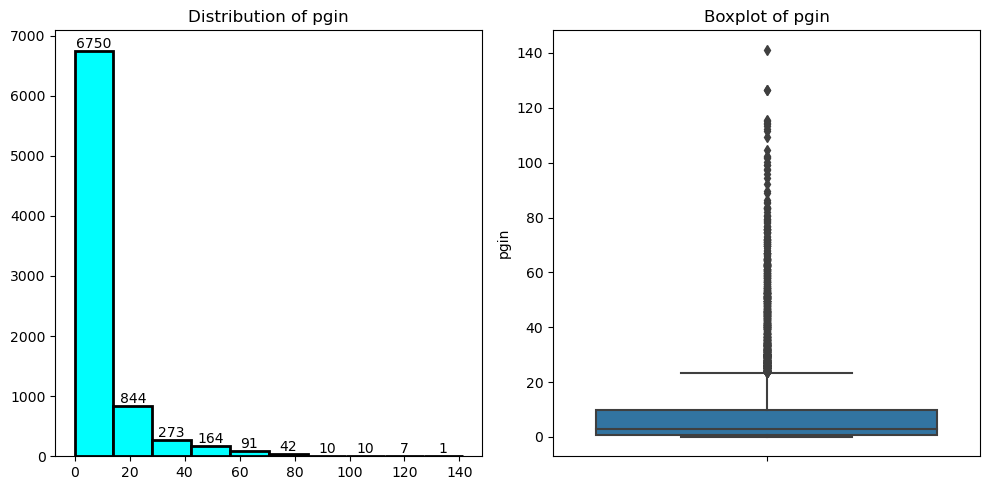

Description of ppgin
---------
count    8192.00
mean       12.39
std        22.28
min         0.00
25%         0.60
50%         3.80
75%        13.80
max       292.61
Name: ppgin, dtype: float64 

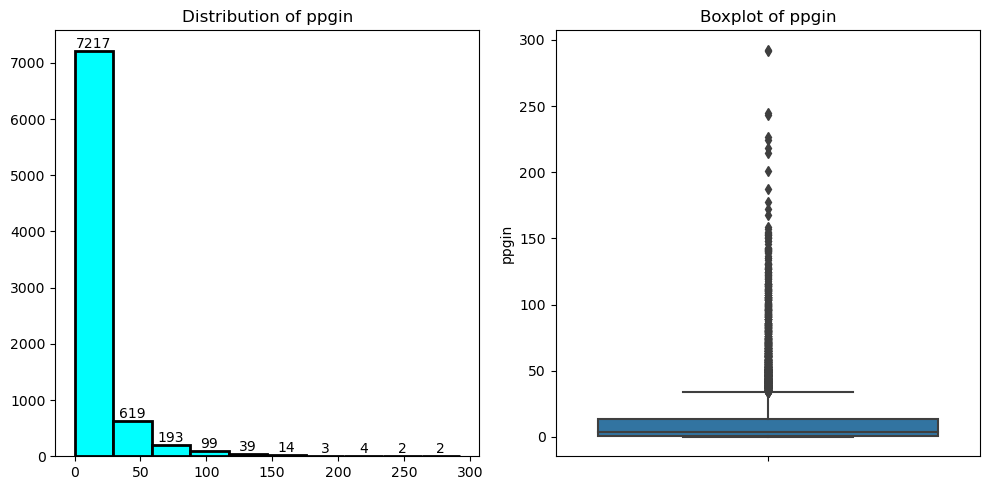

Description of pflt
---------
count    8192.00
mean      109.79
std       114.42
min         0.00
25%        25.00
50%        63.80
75%       159.60
max       899.80
Name: pflt, dtype: float64 

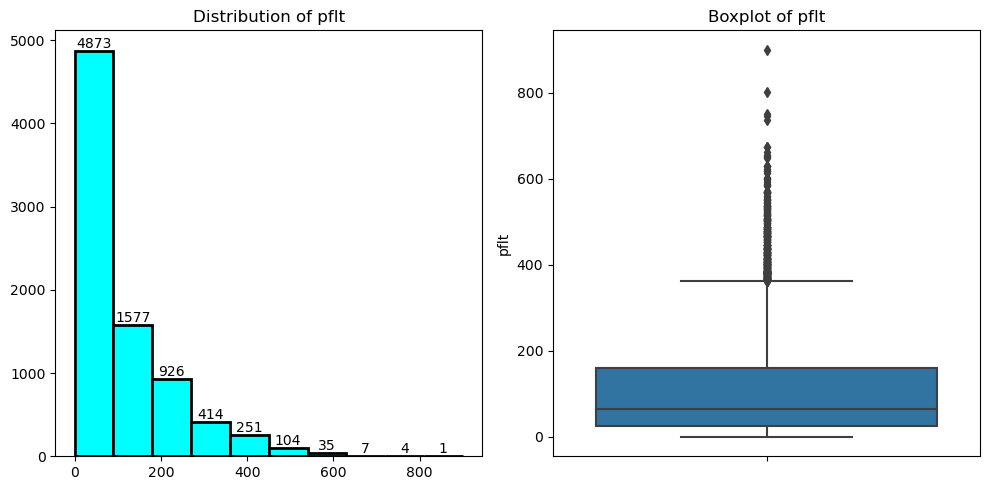

Description of vflt
---------
count    8192.00
mean      185.32
std       191.00
min         0.20
25%        45.40
50%       120.40
75%       251.80
max      1365.00
Name: vflt, dtype: float64 

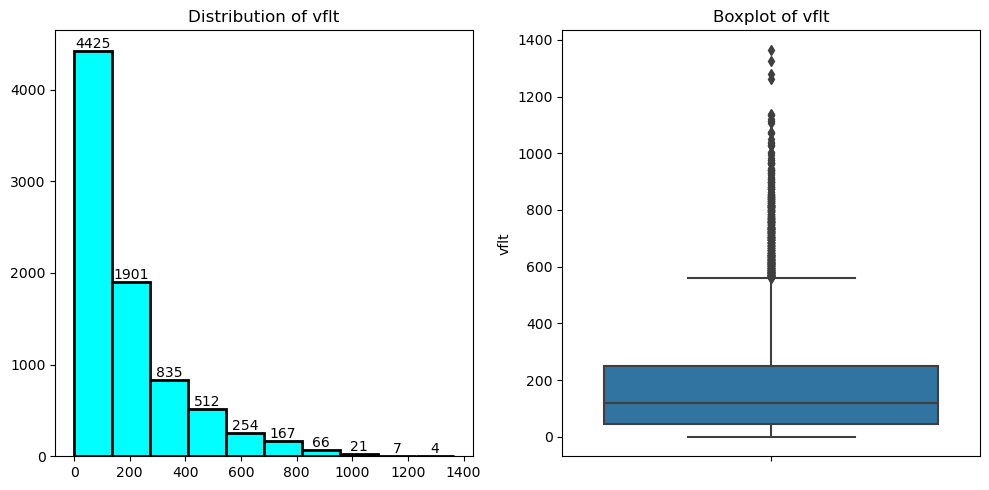

Description of freemem
---------
count     8192.00
mean      1763.46
std       2482.10
min         55.00
25%        231.00
50%        579.00
75%       2002.25
max      12027.00
Name: freemem, dtype: float64 

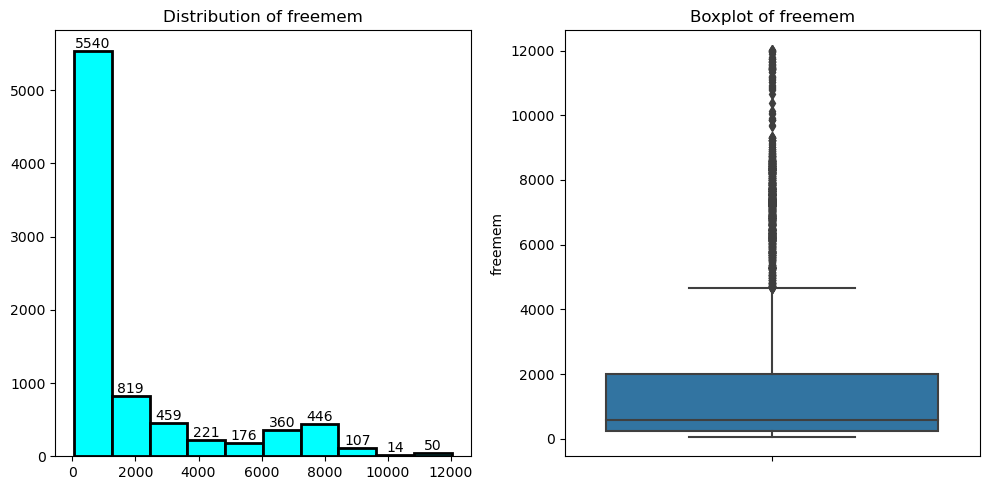

Description of freeswap
---------
count       8192.00
mean     1328125.96
std       422019.43
min            2.00
25%      1042623.50
50%      1289289.50
75%      1730379.50
max      2243187.00
Name: freeswap, dtype: float64 

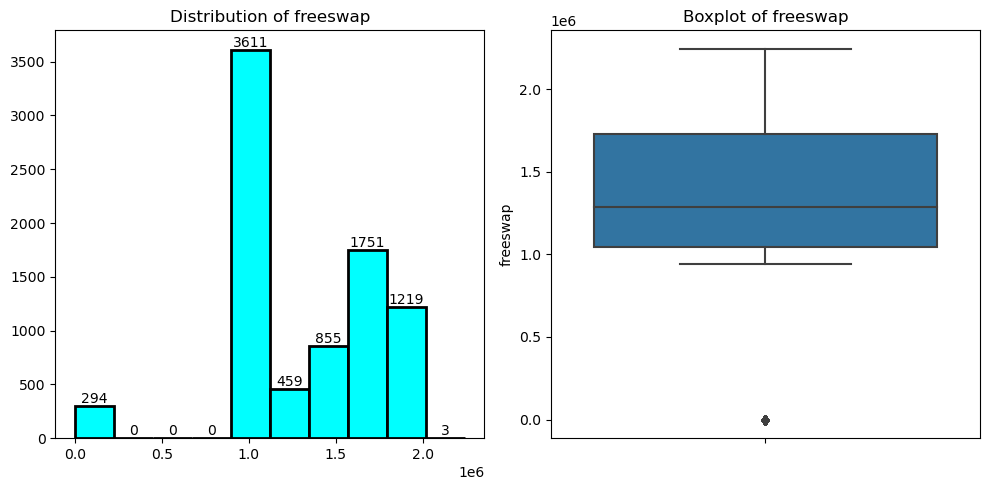

Description of usr
---------
count    8192.00
mean       83.97
std        18.40
min         0.00
25%        81.00
50%        89.00
75%        94.00
max        99.00
Name: usr, dtype: float64 

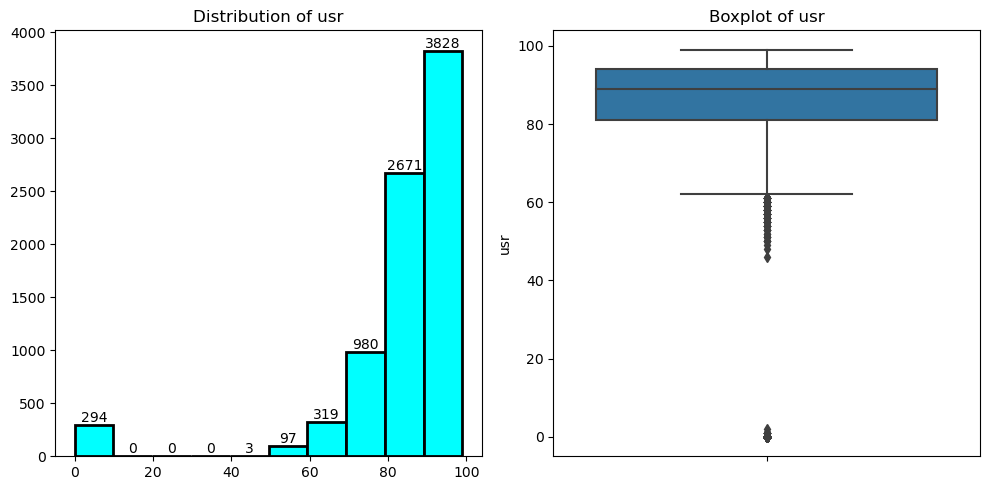

In [14]:
for x in list_df_num:
    univariateAnalysis_numeric(x,10)

In [15]:
# All the variables has outliers
# Dependent variable usr & independent variable freeswap are left skewed and all the other variables are right skewed
# Also, these tow variables have outliers below thier lower limit

### 1.1.6 Multivariate analysis

#### 1.1.6.1 Numerical vs Numerical

plt.figure(figsize=(20,7))
sns.pairplot(data=df,vars=['lread',
 'lwrite',
 'scall',
 'sread',
 'swrite',
 'fork',
 'exec',
 'rchar',
 'wchar',
 'pgout',
 'ppgout',
 'pgfree',
 'pgscan',
 'atch',
 'pgin',
 'ppgin',
 'pflt',
 'vflt',
 'freemem',
 'freeswap'],corner=True);
plt.show();

In [16]:
# fork is positively correlated with pflt, vflt & exec variables 
# pgin is positively correlated with ppgin
# vflt is positively correlated with pflt 
# freeswap does not seems to have a correlaton with any of the variables 

#### 1.1.6.2 Numerical vs Categorical

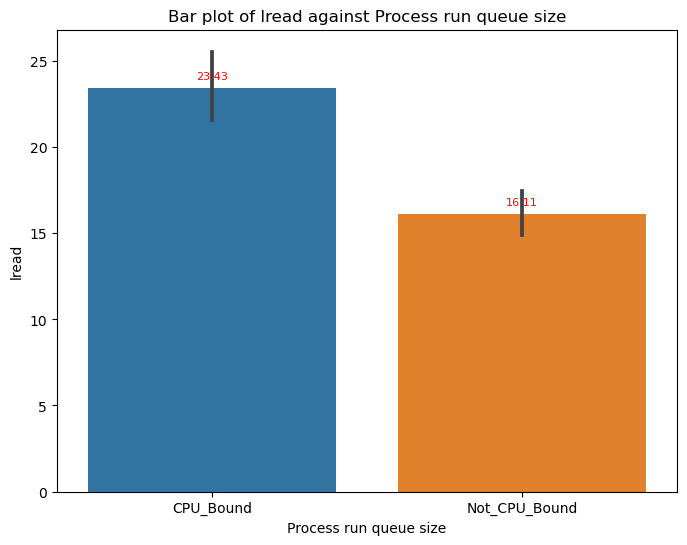

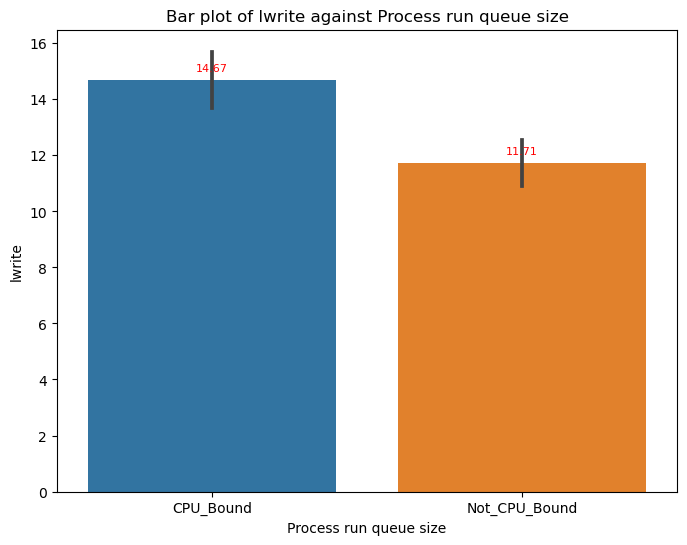

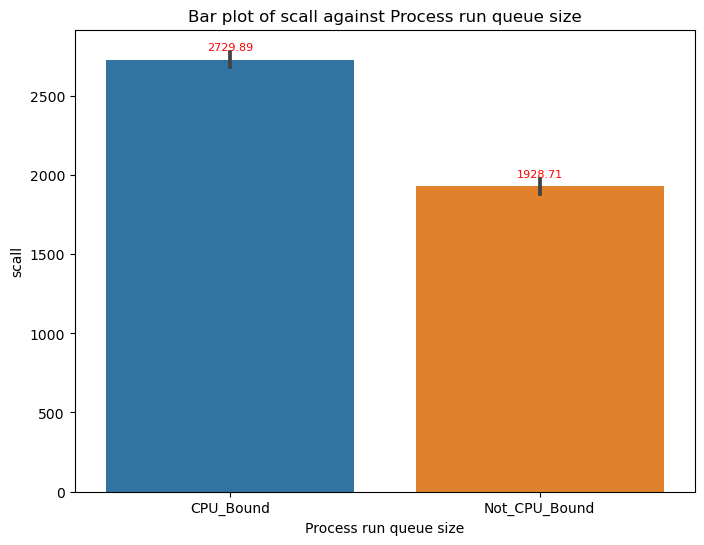

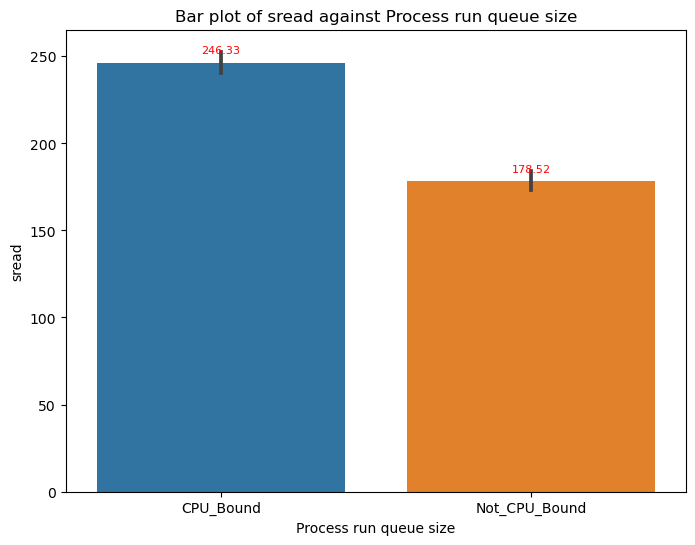

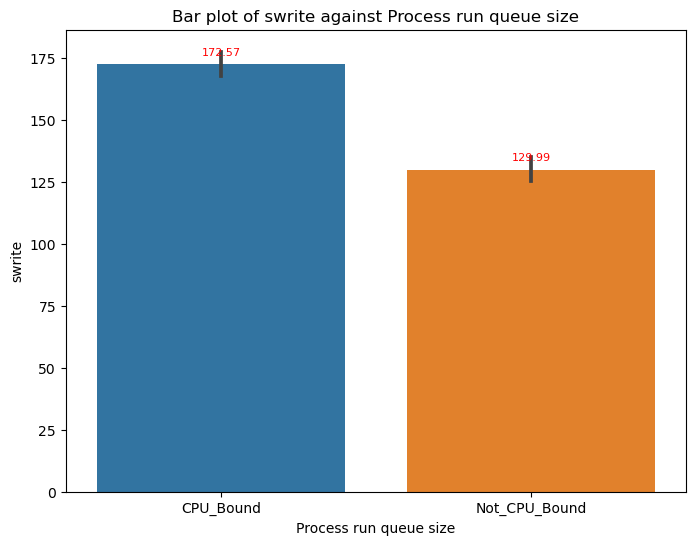

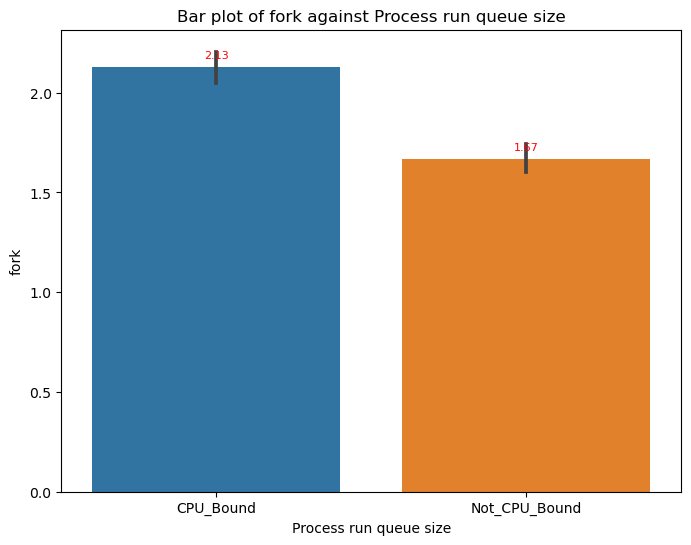

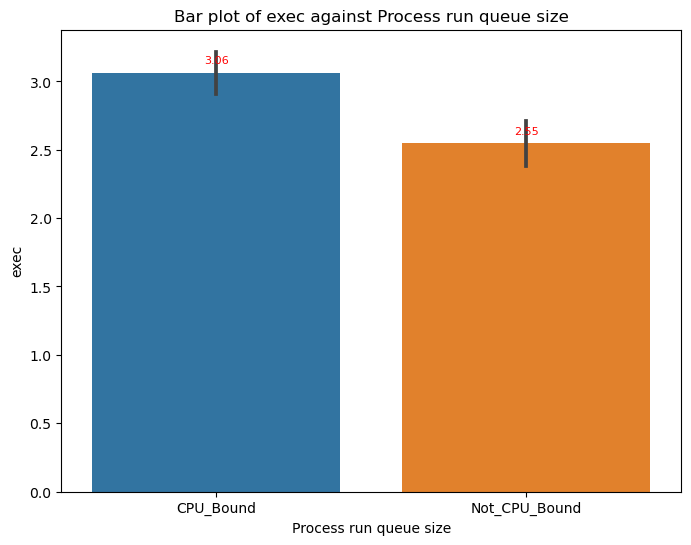

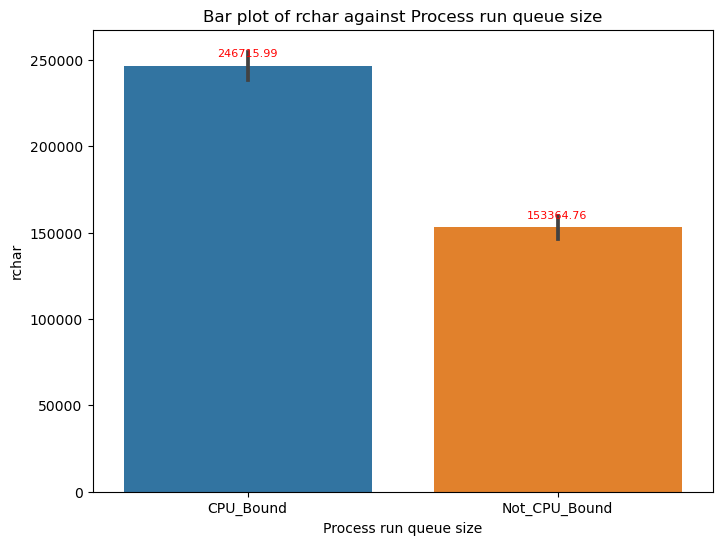

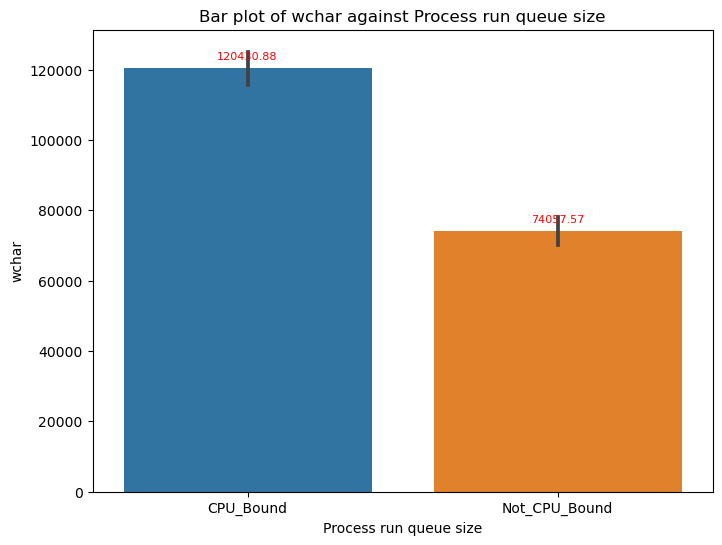

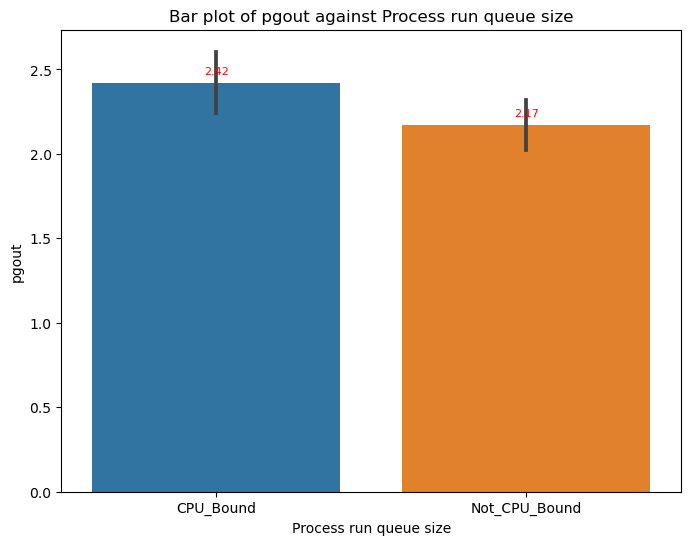

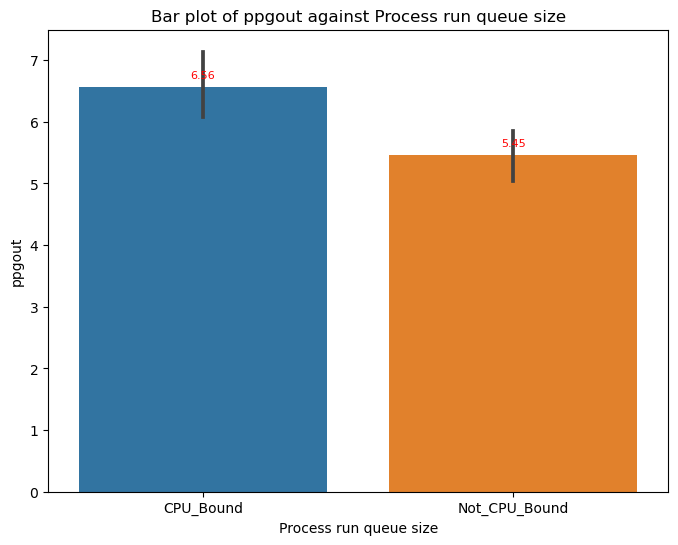

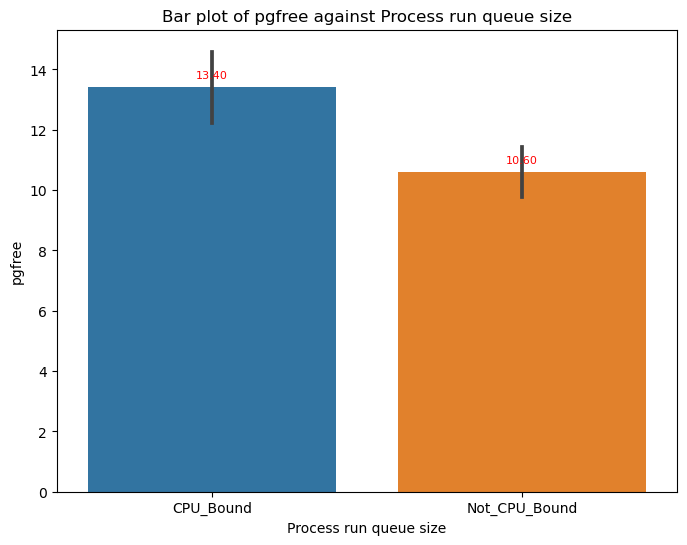

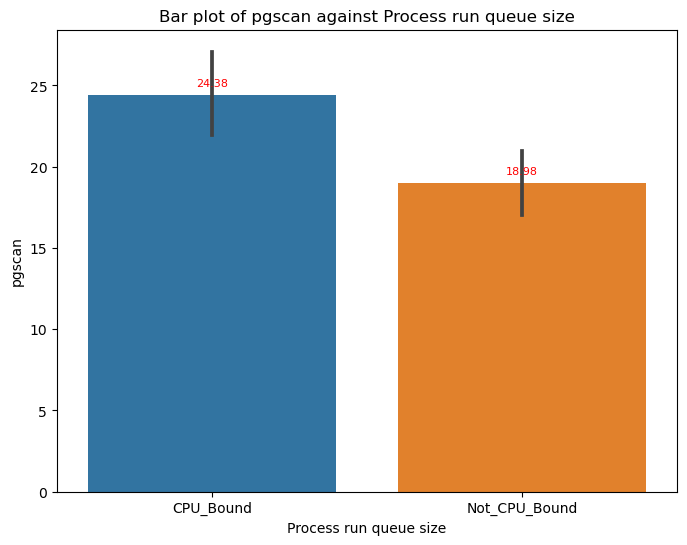

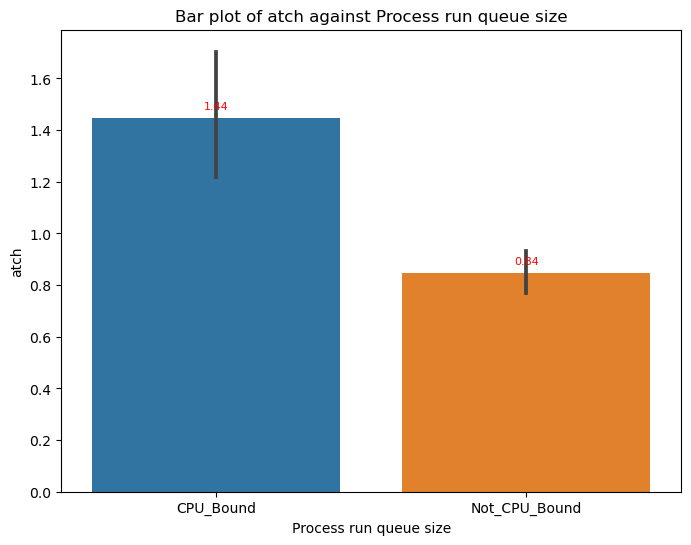

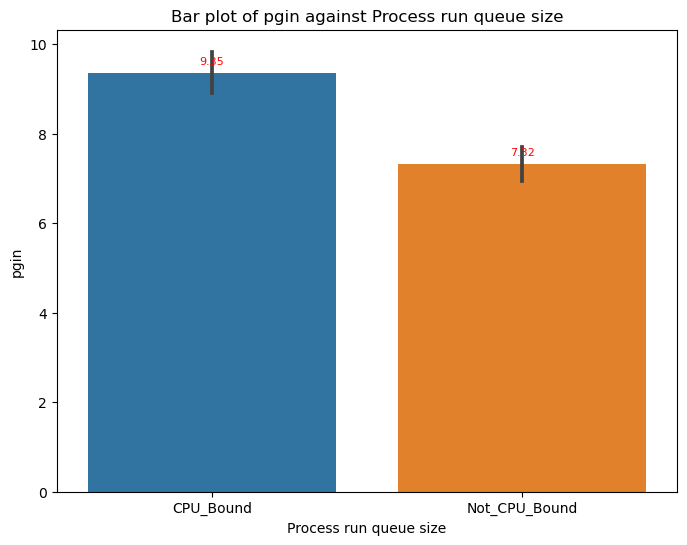

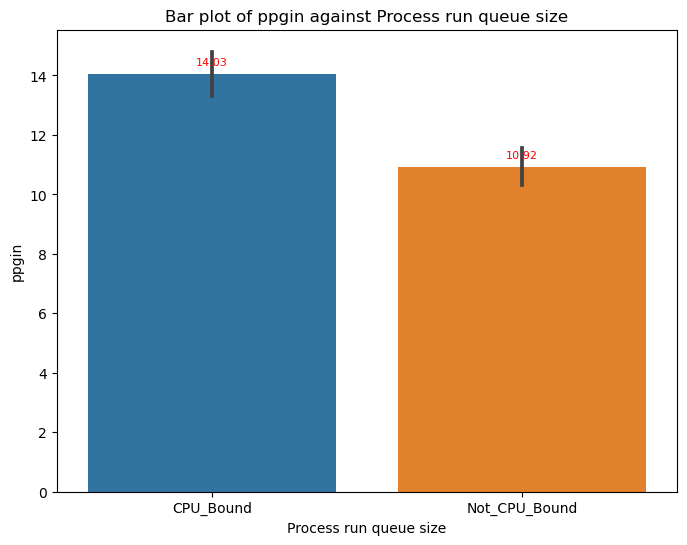

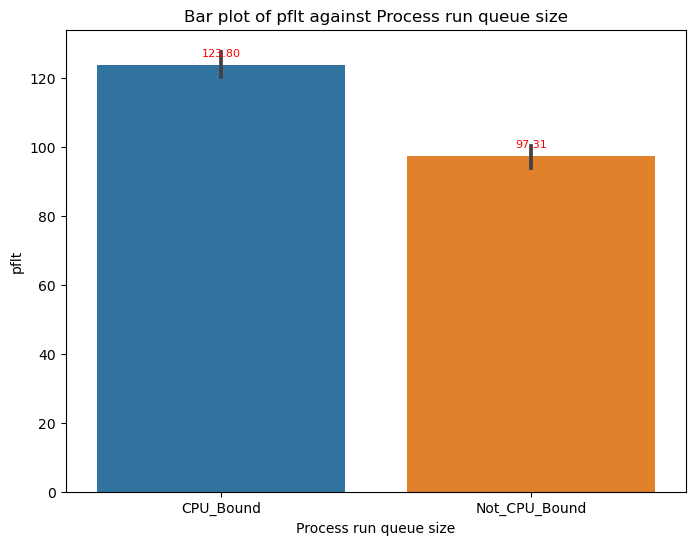

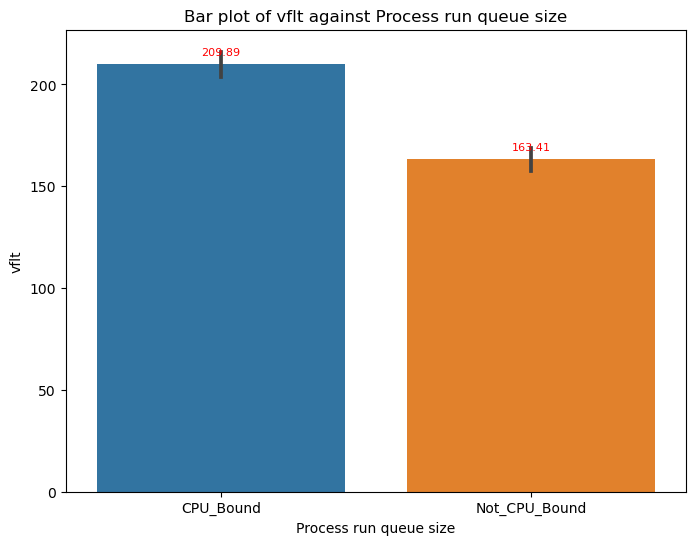

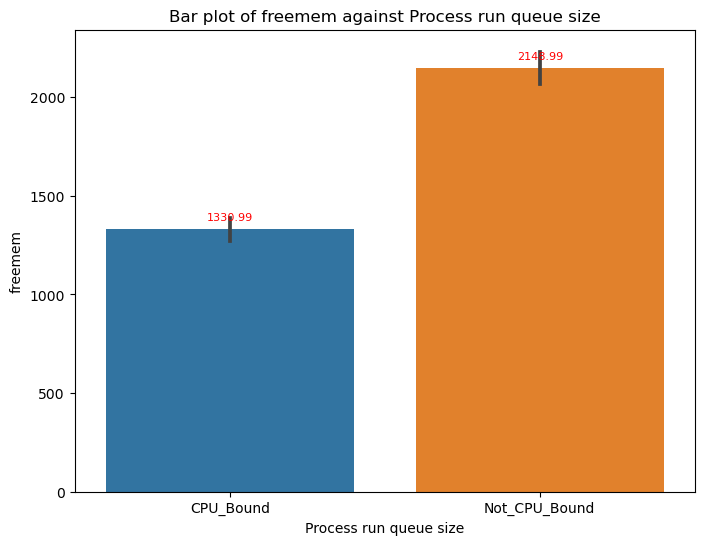

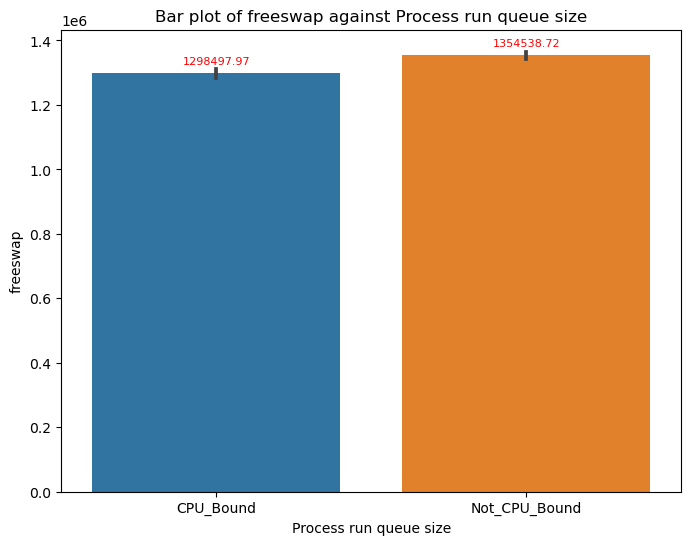

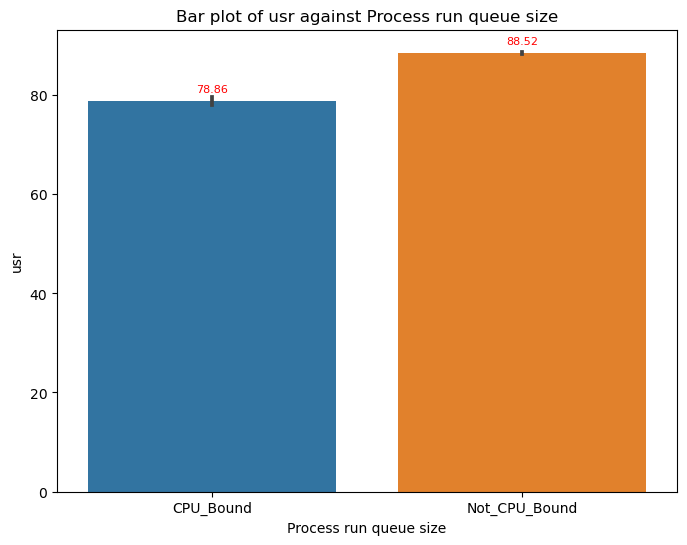

In [17]:
for i in df_num:
    plt.figure(figsize=(8, 6))
    ax=sns.barplot(x='runqsz', y=i, data=df, linewidth=0, edgecolor='None')
    
    plt.title(f'Bar plot of {i} against Process run queue size')
    plt.xlabel('Process run queue size')
    plt.ylabel(i)
    
    
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', 
                    va='bottom',
                    xytext=(0, 5), 
                    textcoords='offset points',
                    fontsize=8,
                    color='red')
    
    
    plt.show()

In [18]:
# Except the varibales usr, freeswap, freemen all other variables are having higher value to be a CPU_Bound variable

### 1.1.7 Patterns and insights - Key meaningful observations

•	Number of characters transferred per second by system read calls is higher at all percentile than system write calls
•	Most of the variables having the min value as 0 and values starts at 75%
•	scall, sread, swrite, rchar, wchar, pflt, vflt & freemen having distribution across all the percentile 
•	The object variable runqsz has 2 types with Not_CPU_Bound has the highest frequency of 4331
•	All the variables has outliers
•	Dependent variable usr & independent variable freeswap are left skewed and all the other variables are right skewed
•	Also, these two variables have outliers below their lower limit
•	Variable fork is positively correlated with pflt, vflt & exec variables 
•	Variable pgin is positively correlated with ppgin
•	Variable vflt is positively correlated with pflt 
•	Variable freeswap does not seems to have a correlation with any of the variables
•	Variable usr is negatively correlated with pflt & vflt
•	Except the variables usr, freeswap, freemen all other variables are having higher value to be a CPU_Bound variable


## 1.2 Data Pre-processing


### 1.2.1 Missing Values

In [19]:
# Missing values ca be identified using the isnull with a sum function will fetch the varibale wise null values count

df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [20]:
# Varibales rchar and wchar  has null values. 

In [21]:
df.rchar=df.rchar.fillna(df.rchar.median())
df.wchar=df.wchar.fillna(df.wchar.median())

In [22]:
df.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [23]:
# The missing values are treated using the fillna functuion

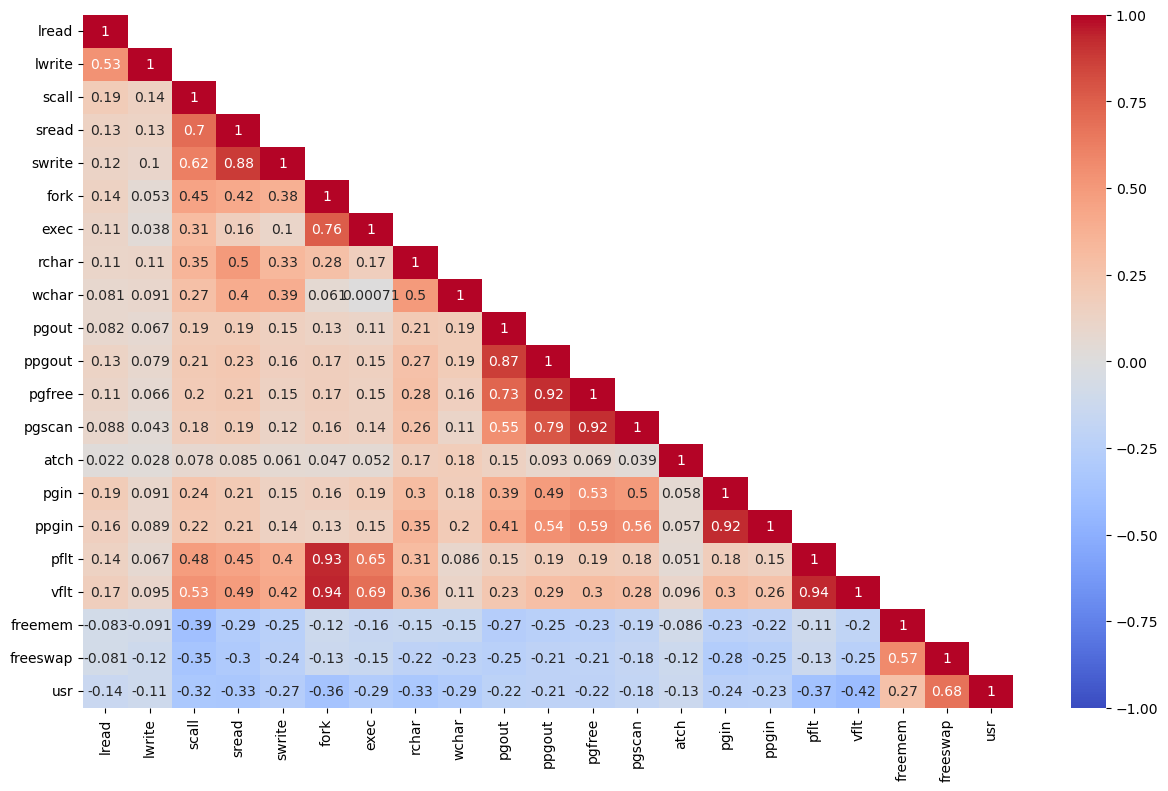

In [24]:
Cor=df.corr(method='pearson')
plt.figure(figsize=(15,9))
mask = np.array (Cor)
mask[np.tril_indices_from(mask)] =False
sns.heatmap(data =Cor, annot =True, mask =mask, vmax =1, vmin=-1, cmap ='coolwarm');

### 1.2.2 Outlier Treatment

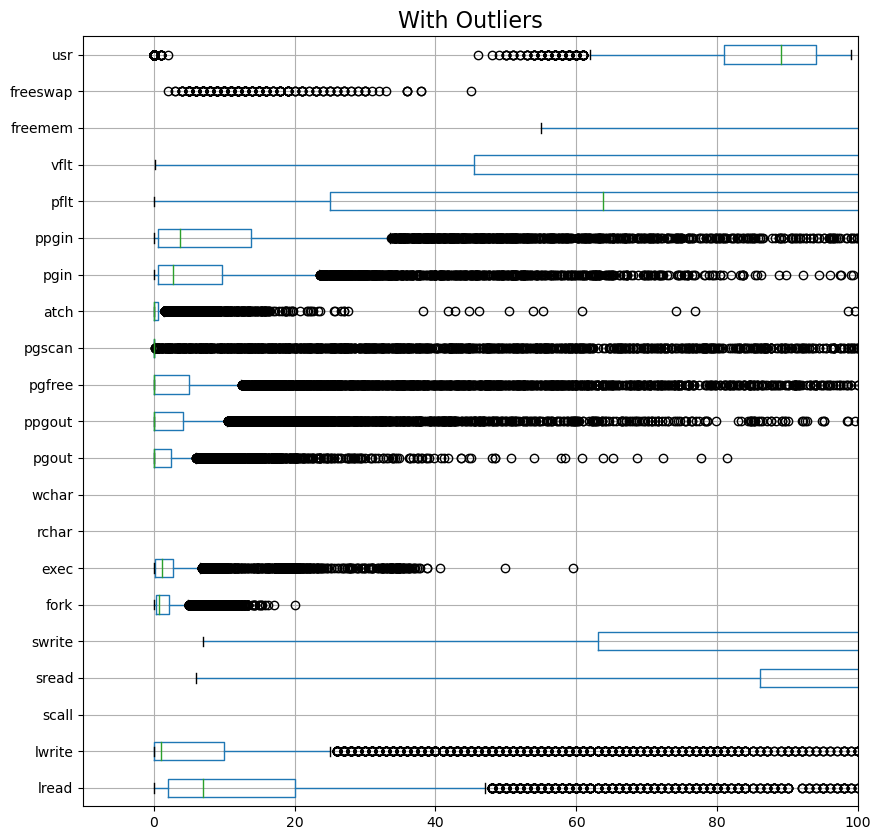

In [25]:
# construct box plot for continuous variables
cont = df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='object') & (df.dtypes!='bool')].index

plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.xlim(-10,100)
plt.show()

In [26]:
def remove_outlier(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    LowerLimit=Q1-(1.5*IQR)
    UpperLimit=Q3+(1.5*IQR)
    return LowerLimit,UpperLimit

In [27]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

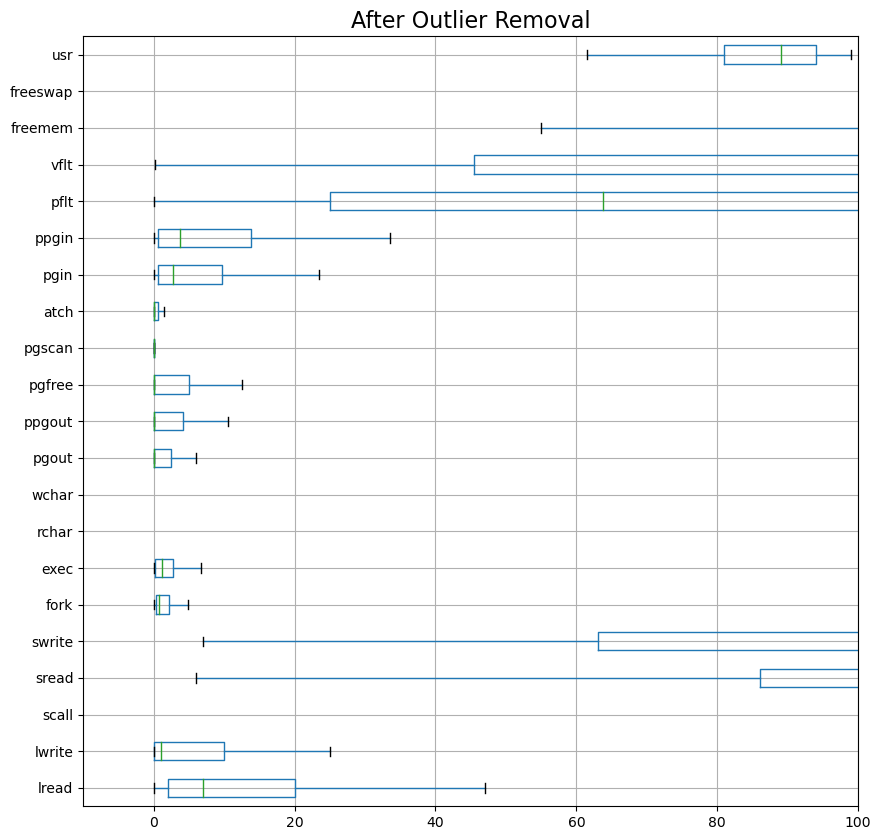

In [28]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.xlim(-10,100)
plt.show()

### 1.2.3 Feature Engineering

### 1.2.4 Encode the data 

In [29]:
df=pd.get_dummies(df,columns=['runqsz'],drop_first=True)
df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,runqsz_Not_CPU_Bound
0,1.0,0.0,2147.0,79.0,68.0,0.2,0.2,40671.0,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,4659.125,1730946.0,95.0,0
1,0.0,0.0,170.0,18.0,21.0,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,4659.125,1869002.0,97.0,1
2,15.0,3.0,2162.0,159.0,119.0,2.0,2.4,125473.5,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,702.000,1021237.0,87.0,1
3,0.0,0.0,160.0,12.0,16.0,0.2,0.2,125473.5,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,4659.125,1863704.0,98.0,1
4,5.0,1.0,330.0,39.0,38.0,0.4,0.4,125473.5,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,633.000,1760253.0,90.0,1


### 1.2.5 Train-test split

In [30]:
Y=df[['usr']]
X=df.drop(['usr'],axis=1)

In [31]:
Y.head()

,usr
0,95.0
1,97.0
2,87.0
3,98.0
4,90.0


In [32]:
X.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,runqsz_Not_CPU_Bound
0,1.0,0.0,2147.0,79.0,68.0,0.2,0.2,40671.0,53995.0,0.0,...,0.0,0.0,0.0,1.6,2.6,16.00,26.40,4659.125,1730946.0,0
1,0.0,0.0,170.0,18.0,21.0,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,0.0,0.0,15.63,16.83,4659.125,1869002.0,1
2,15.0,3.0,2162.0,159.0,119.0,2.0,2.4,125473.5,31950.0,0.0,...,0.0,0.0,1.2,6.0,9.4,150.20,220.20,702.000,1021237.0,1
3,0.0,0.0,160.0,12.0,16.0,0.2,0.2,125473.5,8670.0,0.0,...,0.0,0.0,0.0,0.2,0.2,15.60,16.80,4659.125,1863704.0,1
4,5.0,1.0,330.0,39.0,38.0,0.4,0.4,125473.5,12185.0,0.0,...,0.0,0.0,0.0,1.0,1.2,37.80,47.60,633.000,1760253.0,1


In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [34]:
X_train.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,runqsz_Not_CPU_Bound
694,1.0,1.0,1345.0,223.0,192.0,0.6,0.6,198703.0,230625.875,0.60,...,12.50,0.0,1.5,3.80,7.40,28.20,56.60,121.0,1375446.0,0
5535,1.0,1.0,1429.0,87.0,67.0,0.2,0.2,7163.0,24842.000,0.00,...,0.00,0.0,0.0,1.60,1.60,15.77,30.74,1476.0,1021541.0,1
4244,47.0,25.0,3273.0,225.0,180.0,0.6,0.4,83246.0,53705.000,5.39,...,7.19,0.0,1.5,3.99,4.59,59.88,74.05,82.0,10989.5,0
2472,13.0,8.0,4349.0,300.0,191.0,2.8,3.0,96009.0,70467.000,0.00,...,0.00,0.0,0.0,2.80,3.20,129.00,236.80,772.0,993909.0,0
7052,17.0,23.0,225.0,13.0,13.0,0.4,1.6,17132.0,12514.000,0.00,...,0.00,0.0,0.0,0.00,0.00,19.80,23.80,4179.0,1821682.0,1


In [35]:
print('The shape of X_train dataset is' , X_train.shape)

The shape of X_train dataset is (5734, 21)


In [36]:
print('The shape of X_test dataset is' ,X_test.shape)

The shape of X_test dataset is (2458, 21)


In [37]:
Y_train.head()

,usr
694,91.0
5535,94.0
4244,61.5
2472,83.0
7052,94.0


## 1.3 Model Building - Linear regression using SKlearn Method


### 1.3.1 Building the model

In [38]:
regression_model = LinearRegression()
regression_model = regression_model.fit(X_train, Y_train)

### 1.3.2 Finding the Intercept

In [39]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 84.12174079532724


### 1.3.3 Finding Coefficients

In [40]:
regression_model.coef_

array([[-6.34815062e-02,  4.81612871e-02, -6.63828011e-04,
         3.08252103e-04, -5.42182230e-03,  2.93127272e-02,
        -3.21166484e-01, -5.16684176e-06, -5.40287524e-06,
        -3.68819064e-01, -7.65976821e-02,  8.44841447e-02,
        -1.11022302e-16,  6.27574157e-01,  1.99879077e-02,
        -6.73338398e-02, -3.36028294e-02, -5.46366880e-03,
        -4.58467188e-04,  8.83184026e-06,  1.61529785e+00]])

### 1.3.4 Creating a data frame for the coefficients

In [41]:
# Creating a proper dataframe
model_coeff = pd.DataFrame()
model_coeff["Variables"]= X_train.columns
model_coeff['Coefficient Estimate'] = round (pd.Series(regression_model.coef_[0]),3)
print(model_coeff)

               Variables  Coefficient Estimate
0                  lread                -0.063
1                 lwrite                 0.048
2                  scall                -0.001
3                  sread                 0.000
4                 swrite                -0.005
5                   fork                 0.029
6                   exec                -0.321
7                  rchar                -0.000
8                  wchar                -0.000
9                  pgout                -0.369
10                ppgout                -0.077
11                pgfree                 0.084
12                pgscan                -0.000
13                  atch                 0.628
14                  pgin                 0.020
15                 ppgin                -0.067
16                  pflt                -0.034
17                  vflt                -0.005
18               freemem                -0.000
19              freeswap                 0.000
20  runqsz_No

### 1.3.5 Visualization of the coefficients

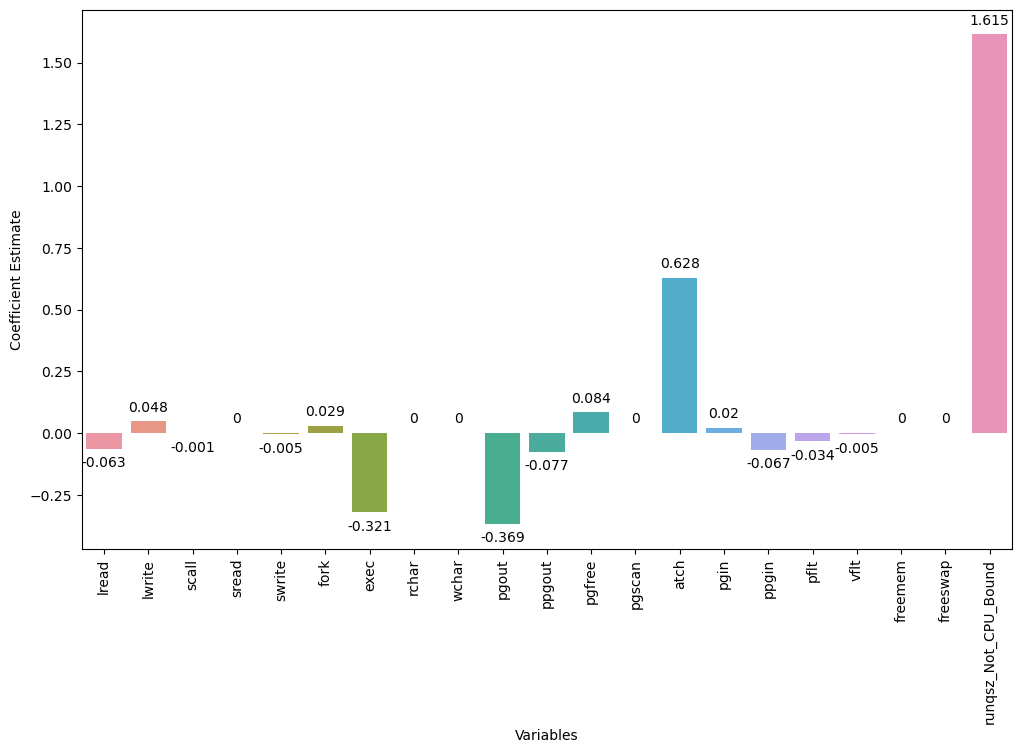

In [42]:
# Visualizing the coefficients
plt.subplots(figsize = (12, 7))
ax = sns.barplot(x = 'Variables', y = 'Coefficient Estimate', data = model_coeff)
ax.bar_label(ax.containers[0], label_type='edge' , rotation =0, fontsize = 10, padding =5) #matplotlib version is above 3.4
plt.xticks(rotation=90);
plt.show()

In [43]:
round (pd.DataFrame(regression_model.coef_.reshape(1,-1),columns=X_train.columns),3).T

,0
lread,-0.063
lwrite,0.048
scall,-0.001
sread,0.000
swrite,-0.005
fork,0.029
exec,-0.321
rchar,-0.000
wchar,-0.000
pgout,-0.369


### 1.3.6 Calculating R-squared value on train & test data

In [44]:
# R square on training data
print('The R-Square score of the train dataset is  ',regression_model.score(X_train, Y_train))

The R-Square score of the train dataset is   0.796108610127457


In [45]:
print('The R-Square score of the test dataset is  ',regression_model.score(X_test, Y_test))

The R-Square score of the test dataset is   0.7677318597936152


### 1.3.7 Calculating train and test predictions

In [46]:
#Train Predictions
predicted_train = regression_model.predict(X_train)
predicted_train

array([[91.5078012 ],
       [91.77883105],
       [74.85526321],
       ...,
       [84.49418847],
       [84.15725271],
       [92.95606428]])

In [47]:
#Test Predictions
predicted_test = regression_model.predict(X_test)
predicted_test

array([[96.91549254],
       [90.34324284],
       [77.86534314],
       ...,
       [97.58162341],
       [90.9160509 ],
       [79.45653718]])

### 1.3.8 Calculating RMSE score for the train & test data

In [48]:
from sklearn import metrics

In [49]:
#RMSE on Training data
print('The RMSE value of train data is ',np.sqrt(metrics.mean_squared_error(Y_train,predicted_train)))

The RMSE value of train data is  4.419536092979902


In [50]:
#RMSE on Testing data
print('The RMSE value of test data is ',np.sqrt(metrics.mean_squared_error(Y_test,predicted_test)))

The RMSE value of test data is  4.65229570419262


## 1.4 Model Building - Linear regression using Statsmodel

### 1.4.1 Building the model using statsmodel

In [51]:
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)

In [52]:
olsmod=sm.OLS(Y_train,X_train)
olsres=olsmod.fit()


### 1.4.2 Checking the OLS Summary

In [53]:
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1115.
Date:                Sun, 14 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:48:32   Log-Likelihood:                -16657.
No. Observations:                5734   AIC:                         3.336e+04
Df Residuals:                    5713   BIC:                         3.350e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1217 

### 1.4.3 Checking the VIF of the Predictors

In [54]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                   29.229332
lread                    5.350560
lwrite                   4.328397
scall                    2.960609
sread                    6.420172
swrite                   5.597135
fork                    13.035359
exec                     3.241417
rchar                    2.133616
wchar                    1.584381
pgout                   11.360363
ppgout                  29.404223
pgfree                  16.496748
pgscan                        NaN
atch                     1.875901
pgin                    13.809339
ppgin                   13.951855
pflt                    12.001460
vflt                    15.971049
freemem                  1.961304
freeswap                 1.841239
runqsz_Not_CPU_Bound     1.156815
dtype: float64



In [55]:
X_train2 = X_train.drop(["ppgout"], axis=1)
olsmod_1 = sm.OLS(Y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [56]:
print('The Adjusted R-squared value difference of variable ppgout is ',round((0.795-0.795),3))

The Adjusted R-squared value difference of variable ppgout is  0.0


In [57]:
X_train = X_train.drop(["ppgout"], axis=1)

In [58]:
olsmod_1=sm.OLS(Y_train,X_train)
olsres_1=olsmod_1.fit()
print(olsres_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1174.
Date:                Sun, 14 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:48:32   Log-Likelihood:                -16658.
No. Observations:                5734   AIC:                         3.336e+04
Df Residuals:                    5714   BIC:                         3.349e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1477 

In [59]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                   29.021961
lread                    5.350387
lwrite                   4.328325
scall                    2.960379
sread                    6.420135
swrite                   5.597025
fork                    13.027305
exec                     3.239231
rchar                    2.133614
wchar                    1.580894
pgout                    6.453978
pgfree                   6.172847
pgscan                        NaN
atch                     1.875553
pgin                    13.784007
ppgin                   13.898848
pflt                    12.001460
vflt                    15.966865
freemem                  1.959267
freeswap                 1.838167
runqsz_Not_CPU_Bound     1.156421
dtype: float64



In [60]:
X_train3 = X_train.drop(["vflt"], axis=1)
olsmod_2 = sm.OLS(Y_train, X_train3)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [61]:
print('The Adjusted R-squared value difference of variable vflt is ',round((0.795-0.795),3))

The Adjusted R-squared value difference of variable vflt is  0.0


In [62]:
X_train = X_train.drop(["vflt"], axis=1)

In [63]:
olsmod_2=sm.OLS(Y_train,X_train)
olsres_2=olsmod_2.fit()
print(olsres_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1235.
Date:                Sun, 14 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:48:32   Log-Likelihood:                -16665.
No. Observations:                5734   AIC:                         3.337e+04
Df Residuals:                    5715   BIC:                         3.349e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0090 

In [64]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series3 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const                   28.641818
lread                    5.335455
lwrite                   4.327130
scall                    2.952947
sread                    6.374687
swrite                   5.595777
fork                    10.089700
exec                     3.235396
rchar                    2.123783
wchar                    1.558923
pgout                    6.450724
pgfree                   6.149223
pgscan                        NaN
atch                     1.864254
pgin                    13.602134
ppgin                   13.898845
pflt                     9.131802
freemem                  1.957966
freeswap                 1.787695
runqsz_Not_CPU_Bound     1.156363
dtype: float64



In [65]:
X_train4 = X_train.drop(["ppgin"], axis=1)
olsmod_3 = sm.OLS(Y_train, X_train4)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.795 
Adjusted R-squared: 0.795


In [66]:
print('The Adjusted R-squared value difference of variable ppgin is ',round((0.795-0.795),3))

The Adjusted R-squared value difference of variable ppgin is  0.0


In [67]:
X_train = X_train.drop(["ppgin"], axis=1)

In [68]:
olsmod_3=sm.OLS(Y_train,X_train)
olsres_3=olsmod_3.fit()
print(olsres_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1305.
Date:                Sun, 14 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:48:33   Log-Likelihood:                -16671.
No. Observations:                5734   AIC:                         3.338e+04
Df Residuals:                    5716   BIC:                         3.350e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0531 

In [69]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series4 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series4))

VIF values: 

const                   28.594882
lread                    5.304009
lwrite                   4.316362
scall                    2.951826
sread                    6.374556
swrite                   5.595670
fork                    10.074886
exec                     3.235387
rchar                    2.090401
wchar                    1.558921
pgout                    6.445478
pgfree                   6.093623
pgscan                        NaN
atch                     1.863536
pgin                     1.529142
pflt                     9.131545
freemem                  1.957713
freeswap                 1.785393
runqsz_Not_CPU_Bound     1.155990
dtype: float64



In [70]:
X_train5 = X_train.drop(["fork"], axis=1)
olsmod_4 = sm.OLS(Y_train, X_train5)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)

R-squared: 0.795 
Adjusted R-squared: 0.794


In [71]:
print('The Adjusted R-squared value difference of variable fork is ',round((0.795-0.794),3))

The Adjusted R-squared value difference of variable fork is  0.001


In [72]:
X_train = X_train.drop(["fork"], axis=1)

In [73]:
olsmod_4=sm.OLS(Y_train,X_train)
olsres_4=olsmod_4.fit()
print(olsres_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1386.
Date:                Sun, 14 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:48:33   Log-Likelihood:                -16672.
No. Observations:                5734   AIC:                         3.338e+04
Df Residuals:                    5717   BIC:                         3.349e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0913 

In [74]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series5 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series5))

VIF values: 

const                   28.440419
lread                    5.285069
lwrite                   4.298019
scall                    2.914853
sread                    6.373458
swrite                   5.390263
exec                     2.856973
rchar                    2.089364
wchar                    1.550686
pgout                    6.445377
pgfree                   6.093041
pgscan                        NaN
atch                     1.862553
pgin                     1.526800
pflt                     3.458168
freemem                  1.957226
freeswap                 1.782829
runqsz_Not_CPU_Bound     1.155448
dtype: float64



In [75]:
X_train6 = X_train.drop(["pgout"], axis=1)
olsmod_5 = sm.OLS(Y_train, X_train6)
olsres_5 = olsmod_5.fit()
print(
    "R-squared:",
    np.round(olsres_5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_5.rsquared_adj, 3),
)

R-squared: 0.794 
Adjusted R-squared: 0.793


In [76]:
print('The Adjusted R-squared value difference of variable pgout is ',round((0.794-0.793),3))

The Adjusted R-squared value difference of variable pgout is  0.001


In [77]:
X_train = X_train.drop(["pgout"], axis=1)

In [78]:
olsmod_5=sm.OLS(Y_train,X_train)
olsres_5=olsmod_5.fit()
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     1466.
Date:                Sun, 14 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:48:33   Log-Likelihood:                -16691.
No. Observations:                5734   AIC:                         3.341e+04
Df Residuals:                    5718   BIC:                         3.352e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0687 

In [79]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series6 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series6))

VIF values: 

const                   28.436398
lread                    5.282393
lwrite                   4.296577
scall                    2.913111
sread                    6.372752
swrite                   5.388217
exec                     2.854068
rchar                    2.087503
wchar                    1.545375
pgfree                   1.920505
pgscan                        NaN
atch                     1.733455
pgin                     1.525951
pflt                     3.456045
freemem                  1.951125
freeswap                 1.782736
runqsz_Not_CPU_Bound     1.151424
dtype: float64



In [80]:
X_train7 = X_train.drop(["sread"], axis=1)
olsmod_6 = sm.OLS(Y_train, X_train7)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.794 
Adjusted R-squared: 0.793


In [81]:
print('The Adjusted R-squared value difference of variable sread is ',round((0.793-0.793),3))

The Adjusted R-squared value difference of variable sread is  0.0


In [82]:
X_train = X_train.drop(["sread"], axis=1)

In [83]:
olsmod_6=sm.OLS(Y_train,X_train)
olsres_6=olsmod_6.fit()
print(olsres_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     1572.
Date:                Sun, 14 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:48:34   Log-Likelihood:                -16691.
No. Observations:                5734   AIC:                         3.341e+04
Df Residuals:                    5719   BIC:                         3.351e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0679 

In [84]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series7 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series7))

VIF values: 

const                   28.362416
lread                    5.274772
lwrite                   4.287213
scall                    2.654972
swrite                   3.013045
exec                     2.847221
rchar                    1.671792
wchar                    1.532280
pgfree                   1.918247
pgscan                        NaN
atch                     1.732431
pgin                     1.524967
pflt                     3.434003
freemem                  1.950595
freeswap                 1.768996
runqsz_Not_CPU_Bound     1.151419
dtype: float64



In [85]:
X_train8 = X_train.drop(["lread"], axis=1)
olsmod_7 = sm.OLS(Y_train, X_train8)
olsres_7 = olsmod_7.fit()
print(
    "R-squared:",
    np.round(olsres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_7.rsquared_adj, 3),
)

R-squared: 0.792 
Adjusted R-squared: 0.791


In [86]:
print('The Adjusted R-squared value difference of variable lread is ',round((0.793-0.791),3))

The Adjusted R-squared value difference of variable lread is  0.002


In [87]:
X_train = X_train.drop(["lread"], axis=1)

In [88]:
olsmod_6=sm.OLS(Y_train,X_train)
olsres_6=olsmod_6.fit()
print(olsres_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     1672.
Date:                Sun, 14 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:48:34   Log-Likelihood:                -16719.
No. Observations:                5734   AIC:                         3.347e+04
Df Residuals:                    5720   BIC:                         3.356e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   83.9725 

In [89]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series8 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series8))

VIF values: 

const                   28.315818
lwrite                   1.052259
scall                    2.648774
swrite                   3.012409
exec                     2.819098
rchar                    1.671676
wchar                    1.529035
pgfree                   1.917372
pgscan                        NaN
atch                     1.732230
pgin                     1.483892
pflt                     3.253088
freemem                  1.950475
freeswap                 1.762866
runqsz_Not_CPU_Bound     1.140440
dtype: float64



In [90]:
X_train9 = X_train.drop(["pgscan"], axis=1)
olsmod_8 = sm.OLS(Y_train, X_train9)
olsres_8 = olsmod_8.fit()
print(
    "R-squared:",
    np.round(olsres_8.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_8.rsquared_adj, 3),
)

R-squared: 0.792 
Adjusted R-squared: 0.791


In [91]:
print('The Adjusted R-squared value difference of variable pgscan is ',round((0.791-0.791),3))

The Adjusted R-squared value difference of variable pgscan is  0.0


In [92]:
X_train = X_train.drop(["pgscan"], axis=1)

In [93]:
olsmod_7=sm.OLS(Y_train,X_train)
olsres_7=olsmod_7.fit()
print(olsres_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     1672.
Date:                Sun, 14 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:48:34   Log-Likelihood:                -16719.
No. Observations:                5734   AIC:                         3.347e+04
Df Residuals:                    5720   BIC:                         3.356e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   83.9725 

In [94]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series9 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series9))

VIF values: 

const                   28.315818
lwrite                   1.052259
scall                    2.648774
swrite                   3.012409
exec                     2.819098
rchar                    1.671676
wchar                    1.529035
pgfree                   1.917372
atch                     1.732230
pgin                     1.483892
pflt                     3.253088
freemem                  1.950475
freeswap                 1.762866
runqsz_Not_CPU_Bound     1.140440
dtype: float64



In [95]:
X_train10 = X_train.drop(["pflt"], axis=1)
olsmod_9 = sm.OLS(Y_train, X_train10)
olsres_9 = olsmod_9.fit()
print(
    "R-squared:",
    np.round(olsres_9.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_9.rsquared_adj, 3),
)

R-squared: 0.734 
Adjusted R-squared: 0.733


In [96]:
print('The Adjusted R-squared value difference of variable pflt is ',round((0.791-0.733),3))

The Adjusted R-squared value difference of variable pflt is  0.058


### 1.4.4 Assumptions

In [97]:
df_pred=pd.DataFrame()
df_pred['Actual Values']=Y_train.values.flatten()
df_pred['Fitted Values']=olsres_7.fittedvalues.values
df_pred['Residuals']=olsres_7.resid.values

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,91.0,89.300965,1.699035
1,94.0,91.690164,2.309836
2,61.5,75.802891,-14.302891
3,83.0,80.511458,2.488542
4,94.0,97.522942,-3.522942


####  1.4.4.1 Linearity & Independence

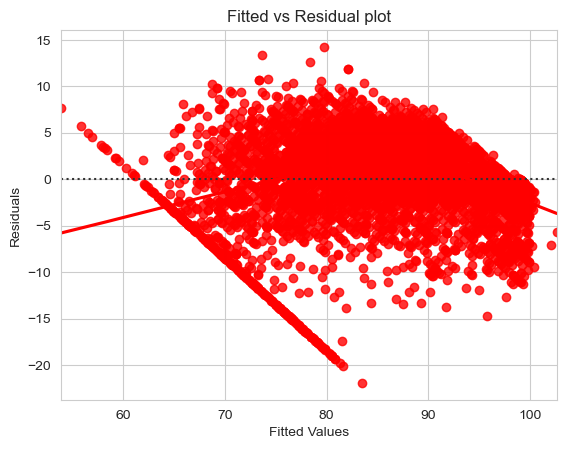

In [98]:
sns.set_style('whitegrid')
sns.residplot(data=df_pred,x='Fitted Values',y='Residuals',color='red',lowess=True);
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

In [99]:
### No patterns identified 

####  1.4.4.2 Normality

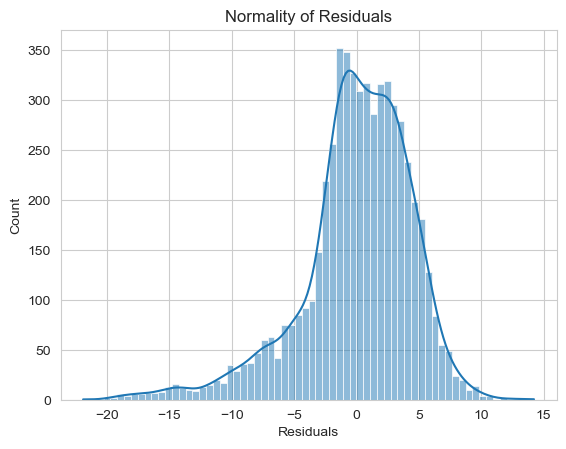

-1.061201368369885

In [100]:
sns.histplot(df_pred['Residuals'],kde=True)
plt.title('Normality of Residuals')
plt.show()
df_pred['Residuals'].skew()

In [101]:
#Statistical Test for Normality
#Null Hypothesis - Data is normal
#Alternate Hypothesis - Data is non-normal
import scipy.stats as stats
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9430180191993713, pvalue=2.023474982485036e-42)

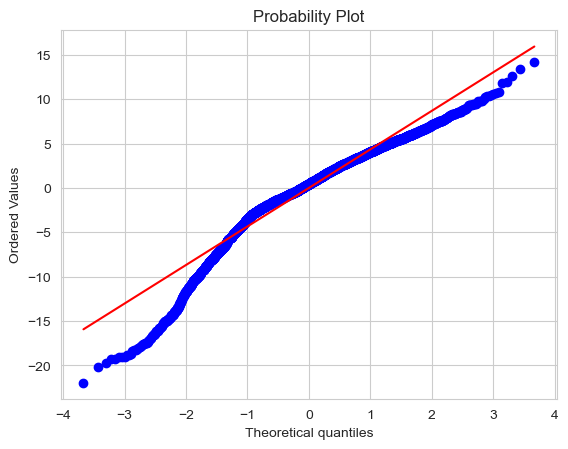

In [102]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

#### 1.4.4.3 Homoscedasticity

In [103]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [104]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train9)
lzip(name, test)

[('F statistic', 1.1139220397084624), ('p-value', 0.0019860830795081015)]

In [105]:
X_train.columns

Index(['const', 'lwrite', 'scall', 'swrite', 'exec', 'rchar', 'wchar',
       'pgfree', 'atch', 'pgin', 'pflt', 'freemem', 'freeswap',
       'runqsz_Not_CPU_Bound'],
      dtype='object')

In [106]:
print(olsres_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     1672.
Date:                Sun, 14 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:48:37   Log-Likelihood:                -16719.
No. Observations:                5734   AIC:                         3.347e+04
Df Residuals:                    5720   BIC:                         3.356e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   83.9725 

### 1.4.5 Predictions

In [107]:
olsres_7.params

const                   83.972509
lwrite                  -0.034501
scall                   -0.000692
swrite                  -0.005817
exec                    -0.385167
rchar                   -0.000005
wchar                   -0.000005
pgfree                  -0.118413
atch                     0.362475
pgin                    -0.096379
pflt                    -0.041631
freemem                 -0.000448
freeswap                 0.000009
runqsz_Not_CPU_Bound     1.644702
dtype: float64

### 1.4.6 Linear Equation

In [108]:
# Let us write the equation of linear regression
Equation = "usr ="
print(Equation, end=" ")
for i in range(len(X_train9.columns)):
    if i == 0:
        print(olsres_7.params[i], "+", end=" ")
    elif i != len(X_train9.columns) - 1:
        print(
            olsres_7.params[i],
            "* (",
            X_train9.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_7.params[i], "* (", X_train9.columns[i], ")")

usr = 83.97250861363338 + -0.034501248661689306 * ( lwrite ) +  -0.0006924438391003225 * ( scall ) +  -0.005816907313513595 * ( swrite ) +  -0.38516662696822623 * ( exec ) +  -5.473325684927575e-06 * ( rchar ) +  -4.8610924794833105e-06 * ( wchar ) +  -0.11841334885500272 * ( pgfree ) +  0.36247530227938113 * ( atch ) +  -0.09637945268316846 * ( pgin ) +  -0.04163081380782967 * ( pflt ) +  -0.0004481966053920618 * ( freemem ) +  9.002038349886397e-06 * ( freeswap ) +  1.6447018685480495 * ( runqsz_Not_CPU_Bound )


In [109]:
X_train9.columns

Index(['const', 'lwrite', 'scall', 'swrite', 'exec', 'rchar', 'wchar',
       'pgfree', 'atch', 'pgin', 'pflt', 'freemem', 'freeswap',
       'runqsz_Not_CPU_Bound'],
      dtype='object')

In [110]:
X_test.columns

Index(['const', 'lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec',
       'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin',
       'ppgin', 'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz_Not_CPU_Bound'],
      dtype='object')

In [111]:
# dropping columns from the test data that are not there in the training data
X_test2 = X_test.drop(
    ["lread", "sread", "fork", "pgout","ppgout","pgscan","ppgin","vflt"], axis=1
)

In [112]:
X_test2.columns

Index(['const', 'lwrite', 'scall', 'swrite', 'exec', 'rchar', 'wchar',
       'pgfree', 'atch', 'pgin', 'pflt', 'freemem', 'freeswap',
       'runqsz_Not_CPU_Bound'],
      dtype='object')

In [113]:
# let's make predictions on the test set
Y_pred_test = olsres_7.predict(X_test2)
Y_pred_train = olsres_7.predict(X_train9)

In [114]:
Y_pred_train.head()

694     89.300965
5535    91.690164
4244    75.802891
2472    80.511458
7052    97.522942
dtype: float64

In [115]:
Y_pred_test.head()

3894    96.661308
4276    90.367606
3414    77.932314
4165    79.060560
7385    78.351108
dtype: float64

### 1.4.7 RMSE on train & test data

In [116]:
# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [117]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(Y_train,Y_pred_train))
print('The RSME value of the train data is ',rmse1)

The RSME value of the train data is  4.467611664735454


In [118]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
print('The RSME value of the test data is ',rmse2)

The RSME value of the test data is  4.7053764916318706


### 1.4.8 MAE on train & test data

In [119]:
# let's check the MAE on the train data
mae1 = mean_absolute_error(Y_train, Y_pred_train)
print('The MAE value of the train data is ',mae1)

The MAE value of the train data is  3.320911925730544


In [120]:
# let's check the MAE on the test data
mae2 = mean_absolute_error(Y_test, Y_pred_test)
print('The MAE value of the test data is ',mae2)

The MAE value of the test data is  3.41900906922404


In [121]:
# let's make predictions on the test set
Y_pred_test = olsres_7.predict(X_test2)
Y_pred_train = olsres_7.predict(X_train9)

In [122]:
## Appending Train and Test data
df_out = Y_pred_train.append (Y_pred_test)

In [123]:
## Dataset with predicted values
df["New"] = df_out
df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,runqsz_Not_CPU_Bound,New
0,1.0,0.0,2147.0,79.0,68.0,0.2,0.2,40671.0,53995.0,0.0,...,0.0,1.6,2.6,16.00,26.40,4659.125,1730946.0,95.0,0,94.201706
1,0.0,0.0,170.0,18.0,21.0,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,15.63,16.83,4659.125,1869002.0,97.0,1,99.343028
2,15.0,3.0,2162.0,159.0,119.0,2.0,2.4,125473.5,31950.0,0.0,...,1.2,6.0,9.4,150.20,220.20,702.000,1021237.0,87.0,1,84.040288
3,0.0,0.0,160.0,12.0,16.0,0.2,0.2,125473.5,8670.0,0.0,...,0.0,0.2,0.2,15.60,16.80,4659.125,1863704.0,98.0,1,98.627627
4,5.0,1.0,330.0,39.0,38.0,0.4,0.4,125473.5,12185.0,0.0,...,0.0,1.0,1.2,37.80,47.60,633.000,1760253.0,90.0,1,98.125236


In [124]:

df.head(20)

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr,runqsz_Not_CPU_Bound,New
0,1.0,0.0,2147.0,79.0,68.0,0.2,0.2,40671.0,53995.000,0.00,...,0.0,1.6000,2.60,16.00,26.40,4659.125,1730946.0,95.0,0,94.201706
1,0.0,0.0,170.0,18.0,21.0,0.2,0.2,448.0,8385.000,0.00,...,0.0,0.0000,0.00,15.63,16.83,4659.125,1869002.0,97.0,1,99.343028
2,15.0,3.0,2162.0,159.0,119.0,2.0,2.4,125473.5,31950.000,0.00,...,1.2,6.0000,9.40,150.20,220.20,702.000,1021237.0,87.0,1,84.040288
3,0.0,0.0,160.0,12.0,16.0,0.2,0.2,125473.5,8670.000,0.00,...,0.0,0.2000,0.20,15.60,16.80,4659.125,1863704.0,98.0,1,98.627627
4,5.0,1.0,330.0,39.0,38.0,0.4,0.4,125473.5,12185.000,0.00,...,0.0,1.0000,1.20,37.80,47.60,633.000,1760253.0,90.0,1,98.125236
5,0.0,0.0,1201.0,65.0,61.0,0.4,0.4,125473.5,58703.000,0.00,...,0.0,0.0000,0.00,28.40,34.40,4659.125,1877461.0,96.0,1,96.935026
6,1.0,0.0,5744.0,168.0,190.0,0.2,0.2,125473.5,189975.000,6.00,...,1.5,0.6000,0.60,27.40,28.60,312.000,1013458.0,89.0,1,86.228569
7,21.0,18.0,2799.0,291.0,211.0,0.6,0.4,125473.5,230625.875,2.60,...,0.0,1.0000,1.00,35.40,71.00,87.000,10989.5,61.5,0,76.145491
8,0.0,0.0,264.0,42.0,33.0,0.2,0.2,125473.5,10116.000,0.00,...,0.0,0.4000,0.80,15.63,18.44,1374.000,1749756.0,98.0,1,98.875789
9,0.0,0.0,188.0,13.0,24.0,0.2,0.2,125473.5,6777.000,0.00,...,0.0,0.0000,0.00,15.60,16.80,4659.125,1859912.0,98.0,1,98.556045


In [125]:
df.isnull().sum()

lread                   0
lwrite                  0
scall                   0
sread                   0
swrite                  0
fork                    0
exec                    0
rchar                   0
wchar                   0
pgout                   0
ppgout                  0
pgfree                  0
pgscan                  0
atch                    0
pgin                    0
ppgin                   0
pflt                    0
vflt                    0
freemem                 0
freeswap                0
usr                     0
runqsz_Not_CPU_Bound    0
New                     0
dtype: int64

In [126]:
X_train9.nunique()

const                      1
lwrite                    26
scall                   3325
swrite                   356
exec                     111
rchar                   5208
wchar                   5024
pgfree                   162
atch                      13
pgin                     370
pflt                    2169
freemem                 1833
freeswap                5380
runqsz_Not_CPU_Bound       2
dtype: int64

In [127]:
Y_train.nunique()

usr    39
dtype: int64

### 1.5 Business Insights & Recommendations

# Problem 2 - Logistic Regression, LDA, CART

## 2.1 Define the problem and perform exploratory Data Analysis

### 2.1.1 Problem definition

#### In your role as a statistician at the Republic of Indonesia Ministry of Health, you have been entrusted with a dataset containing information from a Contraceptive Prevalence Survey. This dataset encompasses data from 1473 married females who were either not pregnant or were uncertain of their pregnancy status during the survey.

#### Your task involves predicting whether these women opt for a contraceptive method of choice. This prediction will be based on a comprehensive analysis of their demographic and socio-economic attributes.

### Data Description

#### 1. Wife's age (numerical)
#### 2. Wife's education (categorical) 1=uneducated, 2, 3, 4=tertiary
#### 3. Husband's education (categorical) 1=uneducated, 2, 3, 4=tertiary
#### 4. Number of children ever born (numerical)
#### 5. Wife's religion (binary) Non-Scientology, Scientology
#### 6. Wife's now working? (binary) Yes, No
#### 7. Husband's occupation (categorical) 1, 2, 3, 4(random)
#### 8. Standard-of-living index (categorical) 1=verlow, 2, 3, 4=high
#### 9. Media exposure (binary) Good, Not good
#### 10. Contraceptive method used (class attribute) No,Yes

### Loading the dataset

In [128]:
dfp=pd.read_excel('Contraceptive_method_dataset.xlsx')

In [129]:
dfp1=dfp.copy()
dfp2=dfp1.copy()
dfp3=dfp2.copy()
dfp4=dfp3.copy()
dfp5=dfp4.copy()

In [130]:
dfp.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [131]:
dfp.tail()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
1468,33.0,Tertiary,Tertiary,NaN,Scientology,Yes,2,Very High,Exposed,Yes
1469,33.0,Tertiary,Tertiary,NaN,Scientology,No,1,Very High,Exposed,Yes
1470,39.0,Secondary,Secondary,NaN,Scientology,Yes,1,Very High,Exposed,Yes
1471,33.0,Secondary,Secondary,NaN,Scientology,Yes,2,Low,Exposed,Yes
1472,17.0,Secondary,Secondary,1.0,Scientology,No,2,Very High,Exposed,Yes


### 2.1.2 Check shape 

In [132]:
print('There no. of rows    = ',dfp.shape[0])
print('There no. of columns = ',dfp.shape[1])

There no. of rows    =  1473
There no. of columns =  10


### 2.1.3 Data types 

In [133]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


### 2.1.4 Statistical summary 

In [134]:
dfp.describe().T

,count,mean,std,min,25%,50%,75%,max
Wife_age,1402.0,32.606277,8.274927,16.0,26.0,32.0,39.0,49.0
No_of_children_born,1452.0,3.254132,2.365212,0.0,1.0,3.0,4.0,16.0
Husband_Occupation,1473.0,2.137814,0.864857,1.0,1.0,2.0,3.0,4.0


In [135]:
dfp.describe(include='object').T

,count,unique,top,freq
Wife_ education,1473,4,Tertiary,577
Husband_education,1473,4,Tertiary,899
Wife_religion,1473,2,Scientology,1253
Wife_Working,1473,2,No,1104
Standard_of_living_index,1473,4,Very High,684
Media_exposure,1473,2,Exposed,1364
Contraceptive_method_used,1473,2,Yes,844


### 2.1.5 Univariate analysis 

#### 2.1.5.1 Numerical

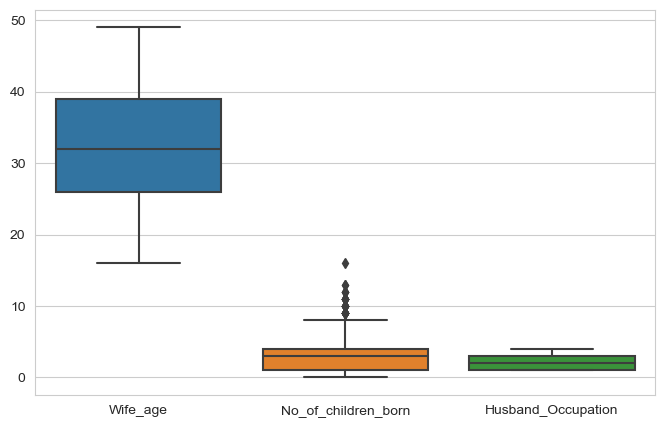

In [136]:
plt.figure(figsize=(8,5))
sns.boxplot(data=dfp);


#### 2.1.5.2 Categorical

In [137]:
dfp_cat=dfp.select_dtypes(include=['object'])
dfp_cat_list=list(dfp_cat)
dfp_cat_list

['Wife_ education',
 'Husband_education',
 'Wife_religion',
 'Wife_Working',
 'Standard_of_living_index',
 'Media_exposure ',
 'Contraceptive_method_used']

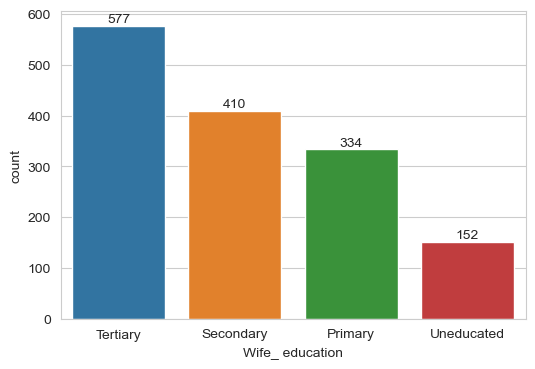

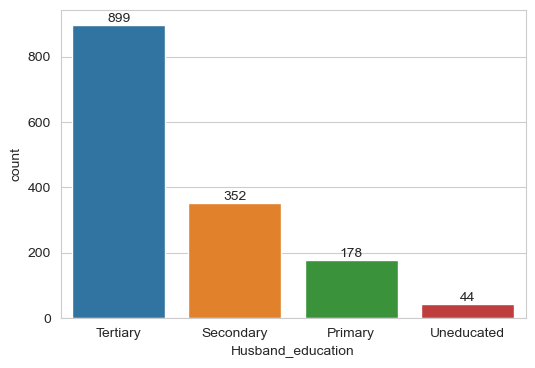

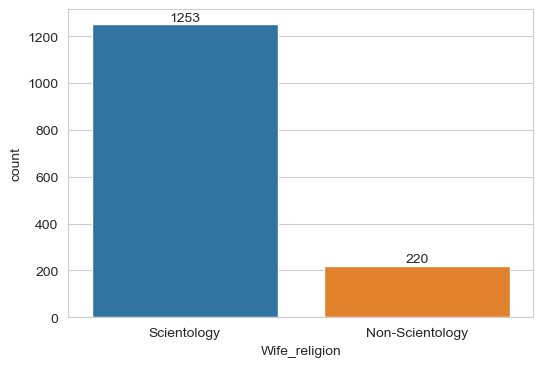

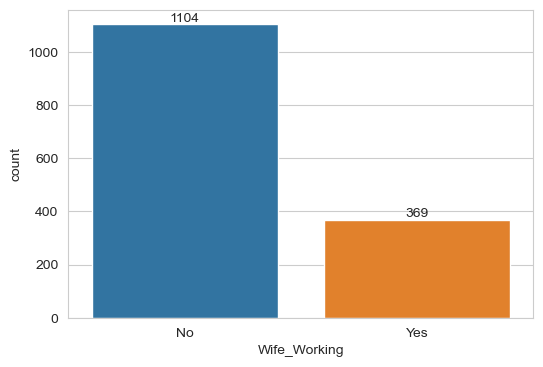

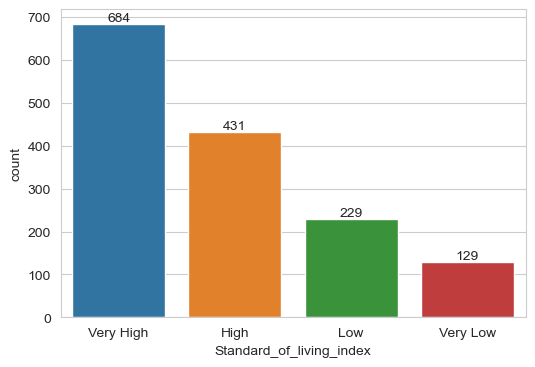

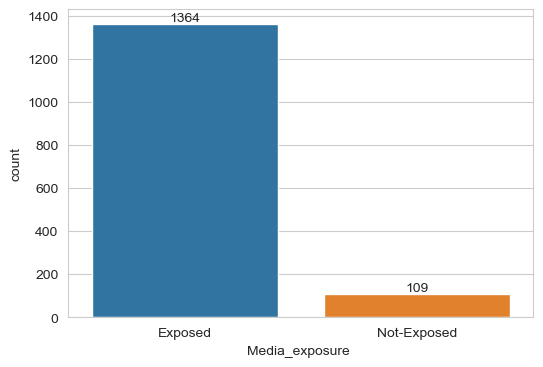

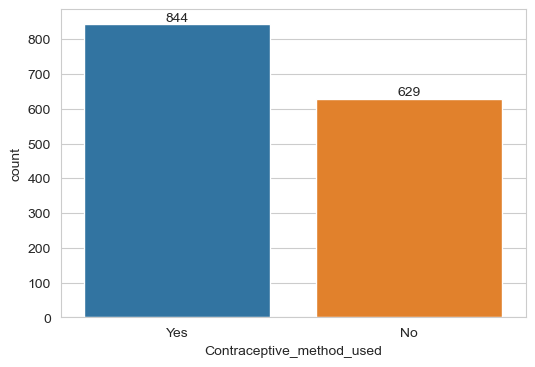

In [138]:
for i in dfp_cat_list:
    plt.figure(figsize=(6,4))
    a=sns.countplot(data=dfp,x=dfp[i],order=dfp[i].value_counts(ascending=False).index);
    a.bar_label(a.containers[0]);

### 2.1.6 Multivariate analysis

#### 2.1.6.1 Numerical vs  Numerical

<Figure size 400x200 with 0 Axes>

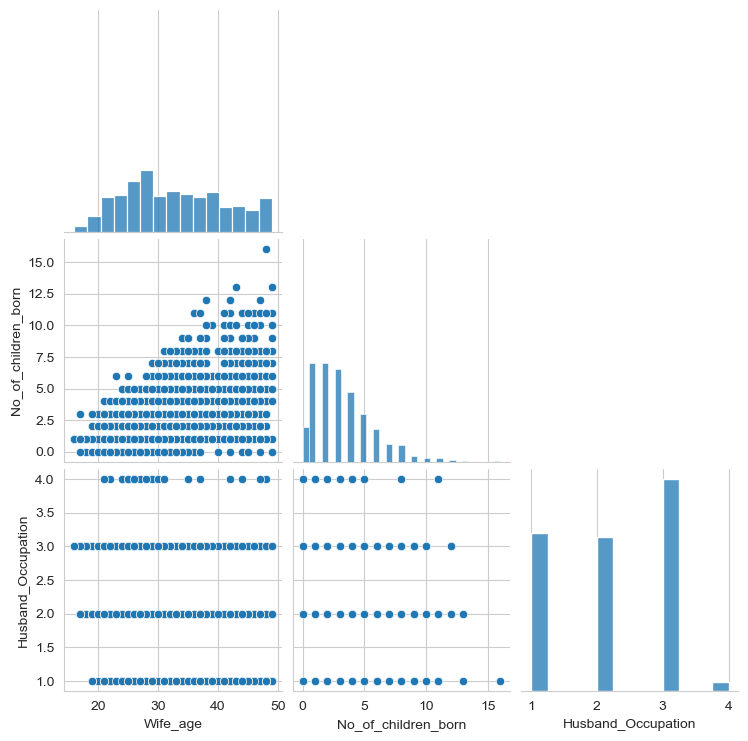

In [139]:
plt.figure(figsize=(4,2))
sns.pairplot(data=dfp,vars=['Wife_age','No_of_children_born','Husband_Occupation'],corner=True)
plt.show()

#### 2.1.6.2 Categorical vs Categorical

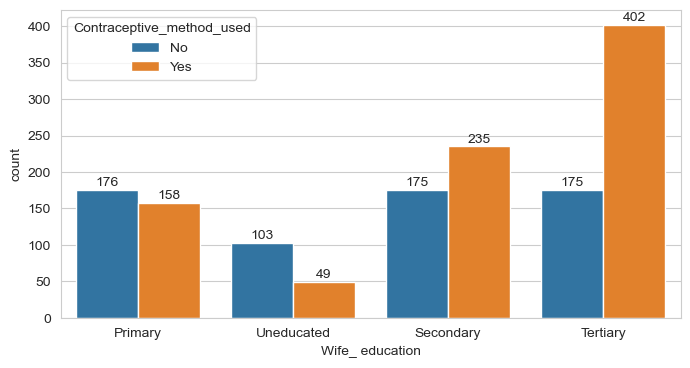

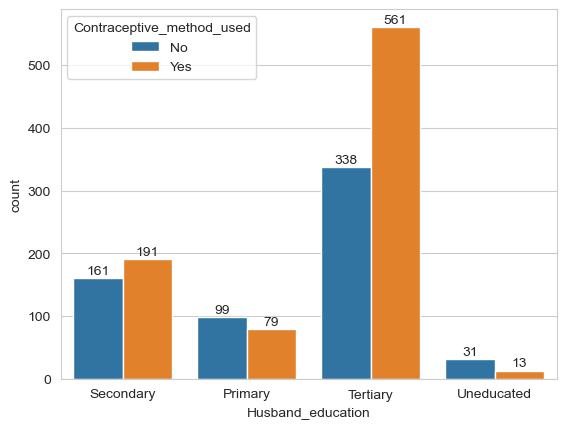

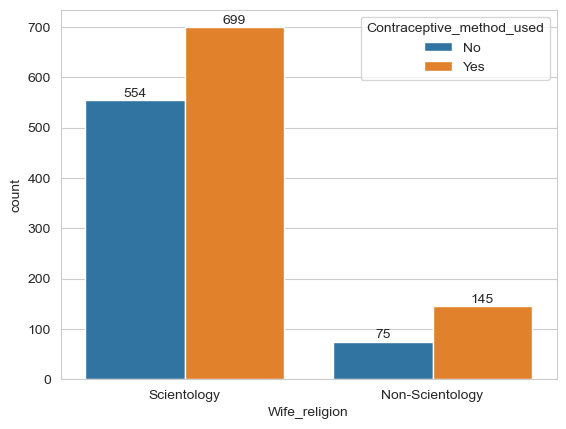

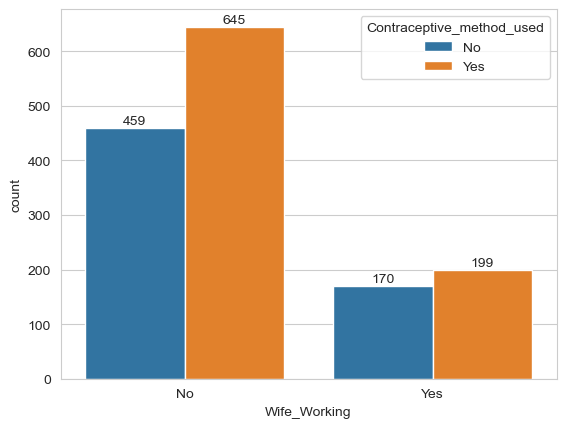

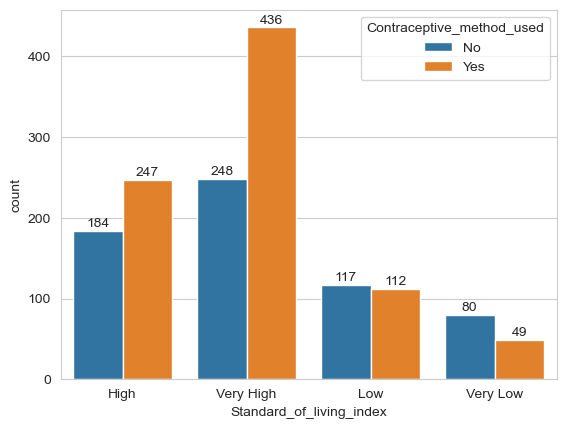

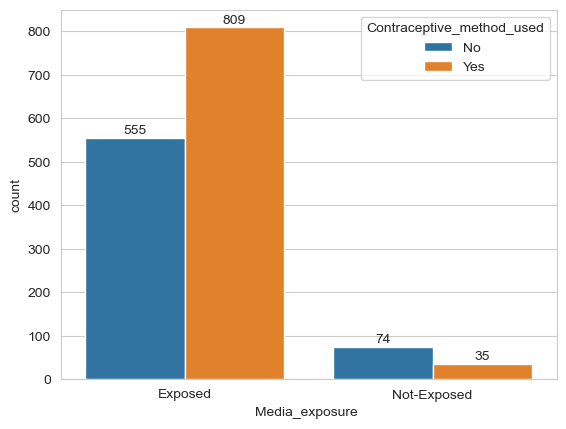

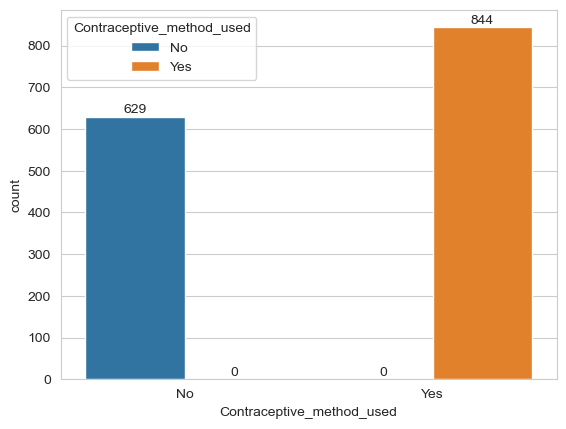

In [140]:
plt.figure(figsize=(8,4))
for i in dfp_cat_list:
    a=sns.countplot(data=dfp, hue=dfp['Contraceptive_method_used'], x=dfp[i])
    for p in a.patches:
        a.annotate(format(p.get_height(), '.0f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center',
               va='center',
               xytext=(0, 5),
               textcoords='offset points')
    #a.bar_label(a.containers[0]);
    plt.show()

#### 2.1.6.3 Numerical vs Categorical

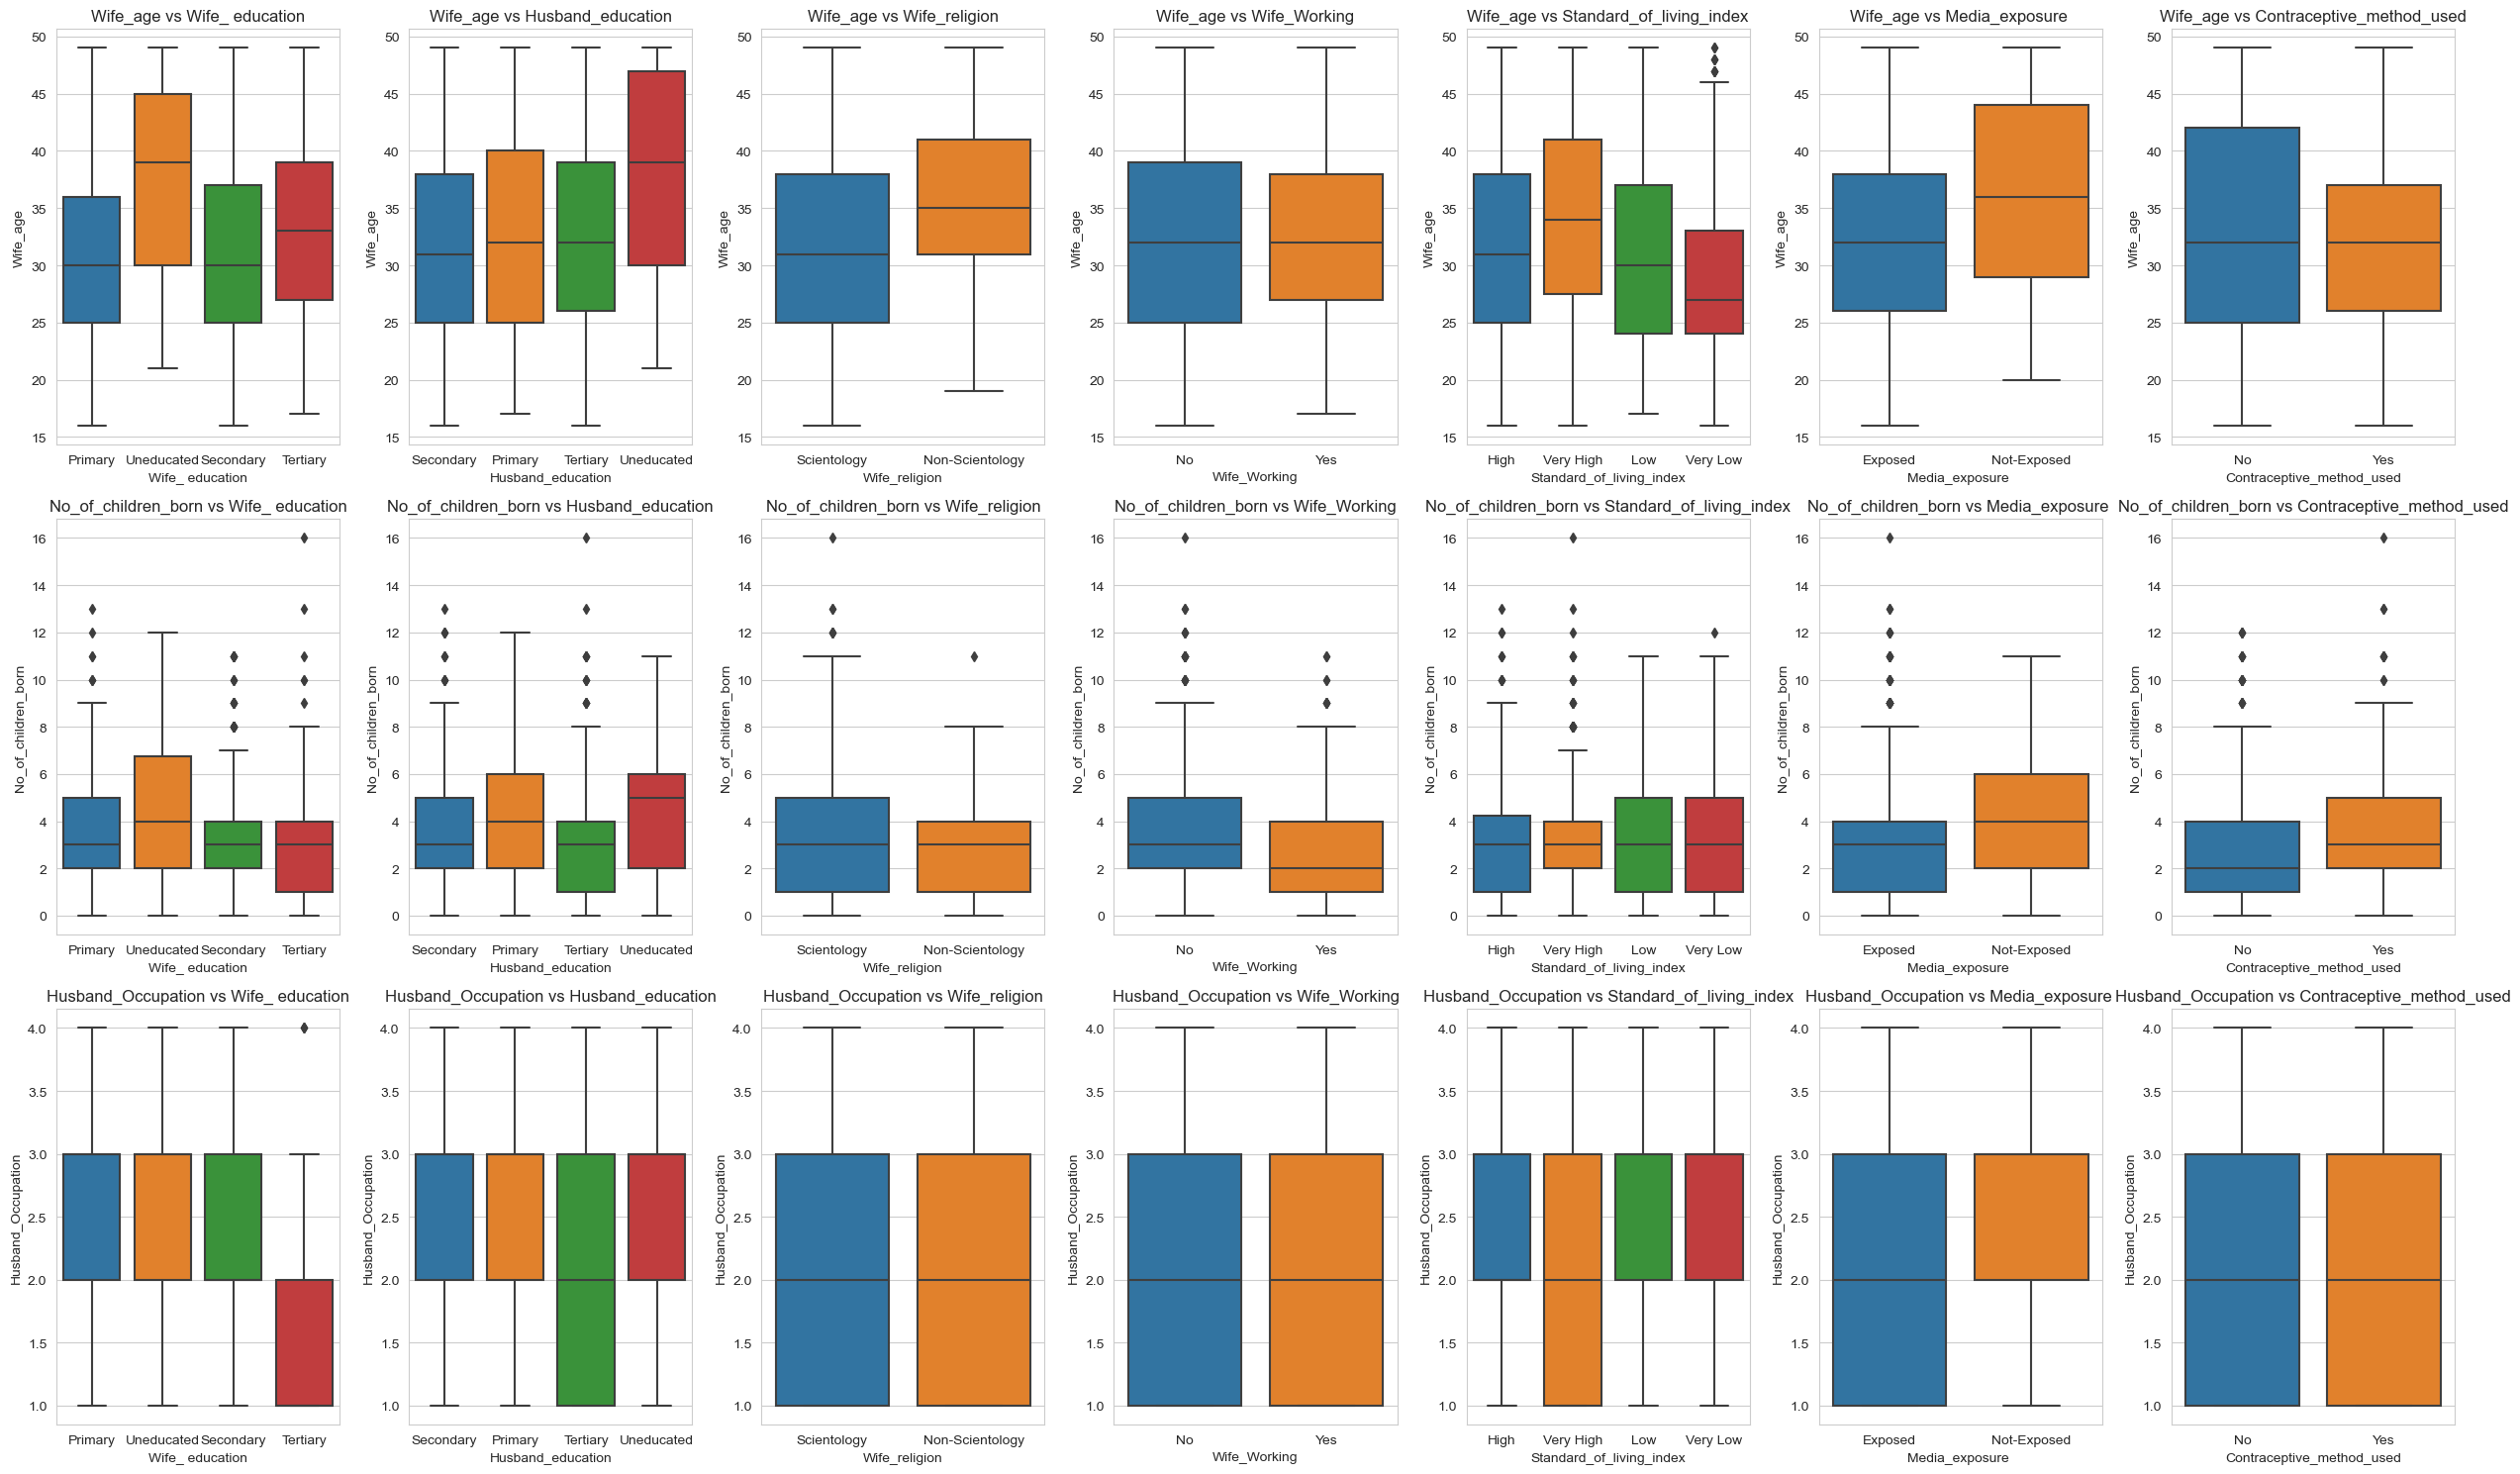

In [141]:
# Define the columns you want to create box plots for
numerical_columns = ['Wife_age','No_of_children_born','Husband_Occupation']
categorical_columns = ['Wife_ education',
 'Husband_education',
 'Wife_religion',
 'Wife_Working',
 'Standard_of_living_index',
 'Media_exposure ',
 'Contraceptive_method_used']

# Create subplots
fig, axes = plt.subplots(len(numerical_columns), len(categorical_columns), figsize=(25,15))

# Nested loop to generate box plots for each combination
for i, num_col in enumerate(numerical_columns):
    for j, cat_col in enumerate(categorical_columns):
        ax = axes[i, j]
        sns.boxplot(y=dfp[num_col], x=dfp[cat_col], ax=ax)
        ax.set_title(f'{num_col} vs {cat_col}')
        ax.set_xlabel(cat_col)
        ax.set_ylabel(num_col)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

### 2.1.7 Patterns and insights - Key meaningful observations

## 2.2 Data Pre - Processing

### 2.2.1 Missing value Treatment (if needed)

In [142]:
dfp.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [143]:
dfp['Wife_age']=dfp['Wife_age'].fillna(dfp['Wife_age'].mean())
dfp['No_of_children_born']=dfp['No_of_children_born'].fillna(dfp['No_of_children_born'].mean())

In [144]:
dfp.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

### 2.2.2 Outlier Detection(treat, if needed) 

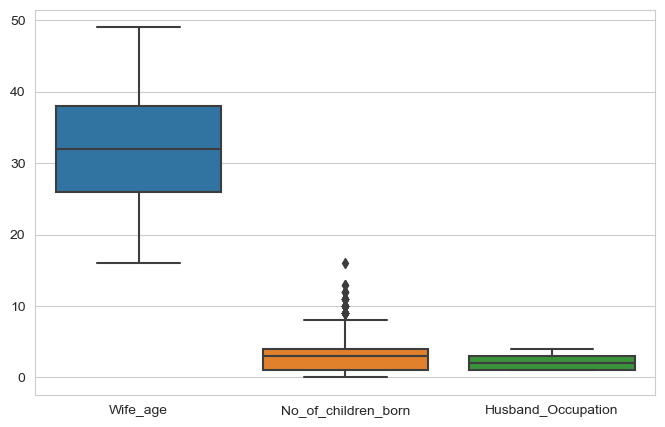

In [145]:
plt.figure(figsize=(8,5))
sns.boxplot(data=dfp);

### 2.2.3 Feature Engineering (if needed)

### 2.2.4 Encode the data

In [146]:
dfp_list_all=list(dfp)
dfp_list_all

['Wife_age',
 'Wife_ education',
 'Husband_education',
 'No_of_children_born',
 'Wife_religion',
 'Wife_Working',
 'Husband_Occupation',
 'Standard_of_living_index',
 'Media_exposure ',
 'Contraceptive_method_used']

In [147]:
dfp['Contraceptive_method_used'].unique()

array(['No', 'Yes'], dtype=object)

In [148]:
dfp['Wife_ education']=np.where(dfp['Wife_ education']=='Uneducated','0',dfp['Wife_ education'])
dfp['Wife_ education']=np.where(dfp['Wife_ education']=='Primary','1',dfp['Wife_ education'])
dfp['Wife_ education']=np.where(dfp['Wife_ education']=='Secondary','2',dfp['Wife_ education'])
dfp['Wife_ education']=np.where(dfp['Wife_ education']=='Tertiary','3',dfp['Wife_ education'])

In [149]:
dfp['Husband_education']=np.where(dfp['Husband_education']=='Uneducated','0',dfp['Husband_education'])
dfp['Husband_education']=np.where(dfp['Husband_education']=='Primary','1',dfp['Husband_education'])
dfp['Husband_education']=np.where(dfp['Husband_education']=='Secondary','2',dfp['Husband_education'])
dfp['Husband_education']=np.where(dfp['Husband_education']=='Tertiary','3',dfp['Husband_education'])

In [150]:
dfp['Wife_religion']=np.where(dfp['Wife_religion']=='Non-Scientology','0',dfp['Wife_religion'])
dfp['Wife_religion']=np.where(dfp['Wife_religion']=='Scientology','1',dfp['Wife_religion'])

In [151]:
dfp['Wife_Working']=np.where(dfp['Wife_Working']=='No','0',dfp['Wife_Working'])
dfp['Wife_Working']=np.where(dfp['Wife_Working']=='Yes','1',dfp['Wife_Working'])

In [152]:
dfp['Standard_of_living_index']=np.where(dfp['Standard_of_living_index']=='Very Low','0',dfp['Standard_of_living_index'])
dfp['Standard_of_living_index']=np.where(dfp['Standard_of_living_index']=='Low','1',dfp['Standard_of_living_index'])
dfp['Standard_of_living_index']=np.where(dfp['Standard_of_living_index']=='High','2',dfp['Standard_of_living_index'])
dfp['Standard_of_living_index']=np.where(dfp['Standard_of_living_index']=='Very High','3',dfp['Standard_of_living_index'])

In [153]:
dfp['Media_exposure ']=np.where(dfp['Media_exposure ']=='Not-Exposed','0',dfp['Media_exposure '])
dfp['Media_exposure ']=np.where(dfp['Media_exposure ']=='Exposed','1',dfp['Media_exposure '])

In [154]:
dfp['Contraceptive_method_used']=np.where(dfp['Contraceptive_method_used']=='No','0',dfp['Contraceptive_method_used'])
dfp['Contraceptive_method_used']=np.where(dfp['Contraceptive_method_used']=='Yes','1',dfp['Contraceptive_method_used'])

In [155]:
dfp.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,1,2,3.0,1,0,2,2,1,0
1,45.0,0,2,10.0,1,0,3,3,1,0
2,43.0,1,2,7.0,1,0,3,3,1,0
3,42.0,2,1,9.0,1,0,3,2,1,0
4,36.0,2,2,8.0,1,0,3,1,1,0


In [156]:
#dfp[~dfp.applymap(np.isreal).all(1)]

### 2.2.5 Train-test split

In [157]:
dfp.groupby(['Contraceptive_method_used']).count()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure
Contraceptive_method_used,,,,,,,,,
0,629,629,629,629,629,629,629,629,629
1,844,844,844,844,844,844,844,844,844


In [158]:
X=dfp.drop(['Contraceptive_method_used'],axis=1)
Y=dfp[['Contraceptive_method_used']]

In [159]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.30,random_state=1)

## 2.3 Model Building and Compare the Performance of the Models

### 2.3.1 Build a Logistic Regression model

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [161]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [162]:
Y_predict=model.predict(X_test)

In [163]:
Y_predict

array(['1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0',
       '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0',
       '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1',
       '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1',
       '0', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '1', '1',
       '0', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0',
       '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1',
       '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1',
       '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0',
       '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1',
       '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1',
       '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0

#### 2.3.1.1 Model Score

In [164]:
model_score=model.score(X_train,Y_train)
print('The model score of the train data is ',round((model_score),2))

The model score of the train data is  0.67


In [165]:
model_score=model.score(X_test,Y_test)
print('The model score of the test data is ',round((model_score),2))

The model score of the test data is  0.69


#### 2.3.1.2 Confusion Matrix

In [166]:
confusion_matrix=metrics.confusion_matrix(Y_test,Y_predict)
print(confusion_matrix)

[[ 95  98]
 [ 41 208]]


plt.figure(figsize=(7,4))
sns.heatmap(confusion_matrix(Y_test,Y_predict),annot=True,fmt='.4g')
plt.show()

#### 2.3.1.3 Classification Report 

In [167]:
classification_report=metrics.classification_report(Y_test,Y_predict)
print(classification_report)

              precision    recall  f1-score   support

           0       0.70      0.49      0.58       193
           1       0.68      0.84      0.75       249

    accuracy                           0.69       442
   macro avg       0.69      0.66      0.66       442
weighted avg       0.69      0.69      0.67       442



### 2.3.2 Build a Linear Discriminant Analysis model

### 2.3.2.1 Model Building

In [168]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [169]:
lda_model=LinearDiscriminantAnalysis()
lda_model.fit(X,Y)

LinearDiscriminantAnalysis()

### 2.3.2.2 Prediction 

In [170]:
pred_class=lda_model.predict(X)
dfp['predication']=pred_class
dfp.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used,predication
0,24.0,1,2,3.0,1,0,2,2,1,0,1
1,45.0,0,2,10.0,1,0,3,3,1,0,1
2,43.0,1,2,7.0,1,0,3,3,1,0,1
3,42.0,2,1,9.0,1,0,3,2,1,0,1
4,36.0,2,2,8.0,1,0,3,1,1,0,1


In [171]:
dfp.tail()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used,predication
1468,33.0,3,3,3.254132,1,1,2,3,1,1,1
1469,33.0,3,3,3.254132,1,0,1,3,1,1,1
1470,39.0,2,2,3.254132,1,1,1,3,1,1,0
1471,33.0,2,2,3.254132,1,1,2,1,1,1,0
1472,17.0,2,2,1.000000,1,0,2,3,1,1,1


### 2.3.2.3 Checking the correlation

In [172]:
data= dfp[['Wife_age','Wife_ education','Husband_education','No_of_children_born',
           'Wife_religion','Wife_Working','Husband_Occupation','Standard_of_living_index','Media_exposure ']]
Cor1 = data.corr()
Cor1

,Wife_age,No_of_children_born,Husband_Occupation
Wife_age,1.000000,0.527019,-0.199495
No_of_children_born,0.527019,1.000000,-0.020857
Husband_Occupation,-0.199495,-0.020857,1.000000


### 2.3.2.4 Confusion Matrix

In [173]:
confusion_matrix(Y,pred_class)

array([[296, 333],
       [143, 701]])

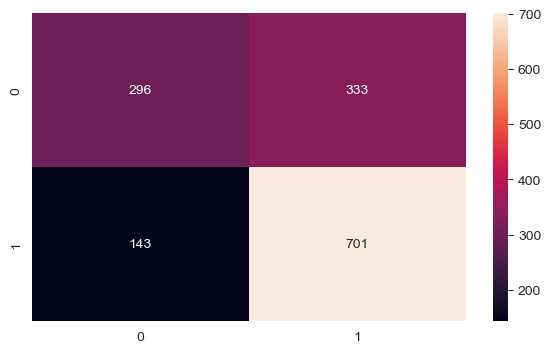

In [174]:
plt.figure(figsize=(7,4))
sns.heatmap(confusion_matrix(Y,pred_class),annot=True,fmt='.4g');

### 2.3.2.5 Classification Report

In [175]:
from sklearn.metrics import classification_report
print(classification_report(Y, pred_class))

              precision    recall  f1-score   support

           0       0.67      0.47      0.55       629
           1       0.68      0.83      0.75       844

    accuracy                           0.68      1473
   macro avg       0.68      0.65      0.65      1473
weighted avg       0.68      0.68      0.66      1473



In [176]:
lda_model_score=lda_model.score(X,Y)
print('The model score of the data is ',round((lda_model_score),2))

The model score of the data is  0.68


### 2.3.3 Build a CART model

In [177]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [178]:
dfp1.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [179]:
dfp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [180]:
dfp1.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [181]:
dfp1['Wife_age']=dfp1['Wife_age'].fillna(dfp1['Wife_age'].mean())
dfp1['No_of_children_born']=dfp1['No_of_children_born'].fillna(dfp1['No_of_children_born'].mean())

In [182]:
dfp1.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

### 2.3.3.1 Changing variables to categorical values

In [183]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for i in dfp1.columns: 
    if dfp1[i].dtype == 'object': 
        dfp1[i] = pd.Categorical(dfp1[i]).codes

In [184]:
dfp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1473 non-null   float64
 1   Wife_ education            1473 non-null   int8   
 2   Husband_education          1473 non-null   int8   
 3   No_of_children_born        1473 non-null   float64
 4   Wife_religion              1473 non-null   int8   
 5   Wife_Working               1473 non-null   int8   
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   int8   
 8   Media_exposure             1473 non-null   int8   
 9   Contraceptive_method_used  1473 non-null   int8   
dtypes: float64(2), int64(1), int8(7)
memory usage: 44.7 KB


### 2.3.3.2 Train Test Split

In [185]:
X1=dfp1.drop('Contraceptive_method_used',axis=1)
Y1=dfp1.pop('Contraceptive_method_used')

In [186]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.3,random_state=1)

### 2.3.3.3 Model Building

In [187]:
model2=DecisionTreeClassifier(criterion='gini')
model2.fit(X1_train,Y1_train)

DecisionTreeClassifier()

### 2.3.3.4 Importing Tree

In [188]:
from sklearn import tree

In [189]:
Y1_train_char = ['No', 'Yes']
Credit_Tree_File = open('/Users/srinivasant/M5 - Predictive Modeling/Week4 - CART/CART.dot','w')
dot_data = tree.export_graphviz(model2, out_file=Credit_Tree_File, feature_names = list(X1_train), class_names = list(Y1_train_char))

Credit_Tree_File.close()

In [190]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model2.feature_importances_, columns = ["Imp"], index = X1_train.columns))


                               Imp
Wife_age                  0.315580
Wife_ education           0.081551
Husband_education         0.076279
No_of_children_born       0.258541
Wife_religion             0.040912
Wife_Working              0.055655
Husband_Occupation        0.080502
Standard_of_living_index  0.082722
Media_exposure            0.008260


### 2.3.3.5 Prune the CART model by finding the best hyperparameters using Grid Search

In [191]:
model3=DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_leaf=10,min_samples_split=30)
model3.fit(X1_train,Y1_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

### 2.3.3.6 Importing Tree after pruning

In [192]:
Y1_train_char = ['No', 'Yes']
Credit_Tree_File = open('/Users/srinivasant/M5 - Predictive Modeling/Week4 - CART/CART1.dot','w')
dot_data = tree.export_graphviz(model3, out_file=Credit_Tree_File, feature_names = list(X1_train), class_names = list(Y1_train_char))

Credit_Tree_File.close()

In [193]:
print(pd.DataFrame(model3.feature_importances_,columns=['Imp'],index=X1_train.columns))

                               Imp
Wife_age                  0.281857
Wife_ education           0.186002
Husband_education         0.000000
No_of_children_born       0.450607
Wife_religion             0.001121
Wife_Working              0.004275
Husband_Occupation        0.015198
Standard_of_living_index  0.034321
Media_exposure            0.026620


### 2.3.3.7 Prediction

In [194]:
Y1_train_predict=model3.predict(X1_train)
Y1_test_predict=model3.predict(X1_test)

In [195]:
Y1_train_predict

array([1, 1, 1, ..., 1, 0, 1], dtype=int8)

In [196]:
Y1_test_predict

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,

### 2.3.3.8 AUC and ROC for the train data

AUC: 0.805


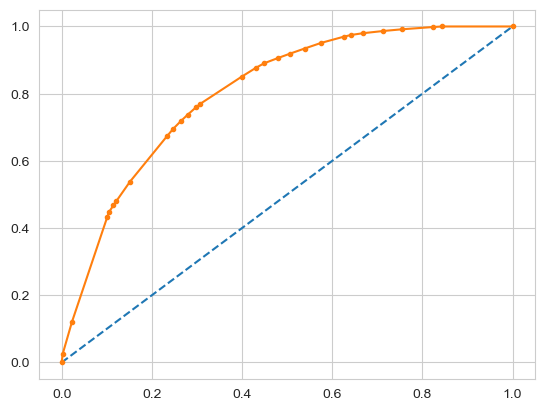

In [197]:
# AUC and ROC for the training data

# predict probabilities
probs = model3.predict_proba(X1_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y1_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y1_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### 2.3.3.9 AUC and ROC for the test data

AUC: 0.755


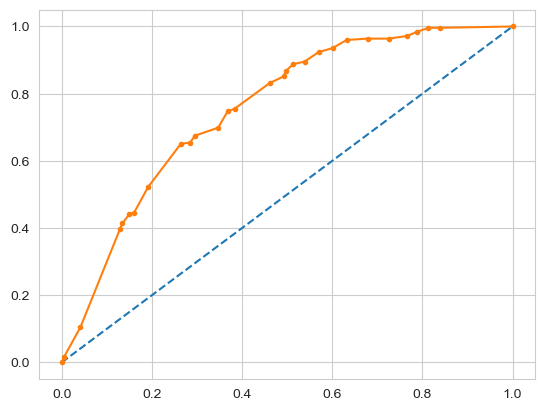

In [198]:
# AUC and ROC for the test data


# predict probabilities
probs = model3.predict_proba(X1_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y1_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y1_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### 2.3.3.10 Classification Report for the train data

In [199]:
from sklearn.metrics import classification_report,confusion_matrix

In [200]:
print(classification_report(Y1_train, Y1_train_predict))

              precision    recall  f1-score   support

           0       0.77      0.57      0.66       436
           1       0.74      0.88      0.80       595

    accuracy                           0.75      1031
   macro avg       0.75      0.72      0.73      1031
weighted avg       0.75      0.75      0.74      1031



### 2.3.3.11 Classification Report for the test data

In [201]:
print(classification_report(Y1_test, Y1_test_predict))

              precision    recall  f1-score   support

           0       0.73      0.51      0.60       193
           1       0.69      0.85      0.76       249

    accuracy                           0.70       442
   macro avg       0.71      0.68      0.68       442
weighted avg       0.71      0.70      0.69       442



### 2.3.3.12 Confusion Matrix for the train data

In [202]:
confusion_matrix(Y1_train, Y1_train_predict)

array([[248, 188],
       [ 73, 522]])

### 2.3.3.13 Confusion Matrix for the test data

In [203]:
confusion_matrix(Y1_test, Y1_test_predict)

array([[ 98,  95],
       [ 37, 212]])

### 2.3.3.14 Model Score for the train data

In [204]:
print('The train data model score is ',round((model3.score(X1_train,Y1_train)),3))

The train data model score is  0.747


### 2.3.3.15 Model Score for the test data

In [205]:
print('The test data model score is ',round((model3.score(X1_test,Y1_test)),3))

The test data model score is  0.701


### 2.3.3.16 Compare the performance of all the models built and choose the best one with proper rationale

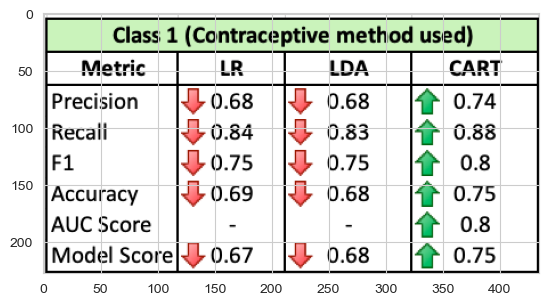

In [206]:
import imageio as iio
img=iio.imread('IMG1.png')
plt.imshow(img);